In [10]:
import pybaseball
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
# Block 1: Setup and Fetch Pitcher Data

import pybaseball
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time
import math
import matplotlib.pyplot as plt # Added here for use in later blocks
import seaborn as sns          # Added here for use in later blocks

# Set plot style (optional)
# sns.set_theme(style="whitegrid")


def get_pitcher_data_interactive():
    """
    Prompts user for PITCHER name & dates, looks up ID, fetches Statcast data.
    Returns the fetched data DataFrame, pitcher's first name, last name,
    start date string, and end date string.
    Returns (None, None, None, None, None) if lookup or fetch fails.
    """
    # --- Get User Input ---
    first_name = input("Enter the PITCHER's first name: ").strip()
    last_name = input("Enter the PITCHER's last name: ").strip()

    while True:
        start_date_str = input("Enter the start date (YYYY-MM-DD): ").strip()
        try:
            datetime.strptime(start_date_str, '%Y-%m-%d')
            break
        except ValueError:
            print("Invalid date format. Please use YYYY-MM-DD.")

    while True:
        end_date_str = input("Enter the end date (YYYY-MM-DD): ").strip()
        try:
            datetime.strptime(end_date_str, '%Y-%m-%d')
            if end_date_str < start_date_str:
                print("End date cannot be before the start date.")
            else:
                break
        except ValueError:
            print("Invalid date format. Please use YYYY-MM-DD.")

    # --- Initialize variables before lookup ---
    player_id = None
    actual_first = None
    actual_last = None
    player_info = pd.DataFrame()

    # --- Look Up Player ID ---
    print(f"\nLooking up player ID for {first_name} {last_name}...")
    try:
        # playerid_lookup works for both pitchers and batters
        player_info = pybaseball.playerid_lookup(last_name, first_name, fuzzy=False)
        if player_info.empty:
            print("No exact match found, trying fuzzy search...")
            player_info = pybaseball.playerid_lookup(last_name, first_name, fuzzy=True)
            if player_info.empty:
                 print(f"Error: Could not find any player ID for {first_name} {last_name} after fuzzy search.")
                 # Let the check below handle the return

        # --- Handle Player Selection (only if player_info is not empty) ---
        if not player_info.empty:
            if len(player_info) == 1:
                player_id = int(player_info['key_mlbam'].iloc[0])
                actual_first = player_info['name_first'].iloc[0]
                actual_last = player_info['name_last'].iloc[0]
                print(f"Found Player: {actual_first} {actual_last} (ID: {player_id})")
            else:
                print(f"\nFound multiple players matching '{first_name} {last_name}'. Please choose one:")
                display_cols = ['name_first', 'name_last', 'key_mlbam', 'mlb_played_first', 'mlb_played_last']
                print(player_info[display_cols].to_markdown(index=False))
                valid_ids = player_info['key_mlbam'].tolist()
                while True:
                    try:
                        chosen_id_str = input(f"Enter the 'key_mlbam' for the player you want: ").strip()
                        chosen_id = int(chosen_id_str)
                        if chosen_id in valid_ids:
                            player_id = chosen_id
                            selected_player = player_info[player_info['key_mlbam'] == player_id].iloc[0]
                            actual_first = selected_player['name_first']
                            actual_last = selected_player['name_last']
                            print(f"Selected Player: {actual_first} {actual_last} (ID: {player_id})")
                            break
                        else:
                            print("Invalid ID. Please enter one of the 'key_mlbam' values listed above.")
                    except ValueError:
                        print("Invalid input. Please enter the numeric 'key_mlbam'.")
    except Exception as e:
        print(f"An error occurred during player lookup: {e}")

    # --- Check if Player ID was determined ---
    if player_id is None or actual_first is None or actual_last is None:
         print("Could not determine player ID after lookup attempts.")
         return None, None, None, None, None # Return None if player not found

    # --- Fetch Statcast Data for PITCHER --- ## *** KEY CHANGE HERE *** ##
    print(f"\nFetching PITCHER Statcast data for {actual_first} {actual_last} ({player_id}) from {start_date_str} to {end_date_str}...")
    try:
        # Use statcast_pitcher instead of statcast_batter
        player_data = pybaseball.statcast_pitcher(start_dt=start_date_str, end_dt=end_date_str, player_id=player_id) # MODIFIED

        if player_data.empty:
            print("No Statcast data found for this pitcher and date range.")
            # Return success, but with empty data; include dates
            return player_data, actual_first, actual_last, start_date_str, end_date_str
        else:
            print(f"Successfully fetched {len(player_data)} pitches.")
            # Return fetched data, names, and dates
            return player_data, actual_first, actual_last, start_date_str, end_date_str

    except Exception as e:
        print(f"An error occurred while fetching Statcast data: {e}")
         # Return None for all expected values on fetch error
        return None, None, None, None, None

# --- Call the function and store results (using pitcher-specific names) ---
print("=== Pitcher Data Fetcher ===")
pitcher_statcast_data, pitcher_first_name, pitcher_last_name, start_date, end_date = get_pitcher_data_interactive()

# Optional check after Block 1 runs
if pitcher_statcast_data is None:
    print("\nBlock 1: Failed to retrieve data. Subsequent blocks cannot run.")
elif pitcher_statcast_data.empty:
    print("\nBlock 1: Retrieved empty dataset (no pitches found for criteria). Subsequent blocks might not show results.")
else:
     # Use pitcher-specific variable names in messages
     print(f"\nBlock 1: Data retrieval successful for pitcher {pitcher_first_name} {pitcher_last_name} ({start_date} to {end_date}).")
     print(f"DataFrame shape: {pitcher_statcast_data.shape}")
     print("Variables `pitcher_statcast_data`, `pitcher_first_name`, etc. are ready for subsequent blocks.")

=== Pitcher Data Fetcher ===


Enter the PITCHER's first name:  Shane
Enter the PITCHER's last name:  Bieber
Enter the start date (YYYY-MM-DD):  2020-01-01
Enter the end date (YYYY-MM-DD):  2020-12-31



Looking up player ID for Shane Bieber...
Gathering player lookup table. This may take a moment.
Found Player: shane bieber (ID: 669456)

Fetching PITCHER Statcast data for shane bieber (669456) from 2020-01-01 to 2020-12-31...
Gathering Player Data
Successfully fetched 1392 pitches.

Block 1: Data retrieval successful for pitcher shane bieber (2020-01-01 to 2020-12-31).
DataFrame shape: (1392, 113)
Variables `pitcher_statcast_data`, `pitcher_first_name`, etc. are ready for subsequent blocks.



--- Block 2: Analyzing Pitch Arsenal ---
Analyzing 1343 pitches for arsenal overview...
Found 'release_spin_rate' data.

Pitch Arsenal Summary for shane bieber (2020-01-01 to 2020-12-31)
| pitch_type   |   Usage (%) |   Count |   Avg Speed (mph) |   Avg Spin (rpm) |   Avg Horz Break (in) |   Avg Vert Break (in) |
|:-------------|------------:|--------:|------------------:|-----------------:|----------------------:|----------------------:|
| FF           |        37.3 |   501.0 |              94.0 |           2356.2 |                  -8.8 |                  18.2 |
| KC           |        27.0 |   363.0 |              83.7 |           2364.4 |                   9.0 |                 -14.4 |
| FC           |        16.2 |   217.0 |              89.2 |           2534.4 |                   1.9 |                   9.0 |
| SL           |        11.2 |   151.0 |              84.5 |           2553.9 |                   1.3 |                  -4.1 |
| CH           |         8.3 |   111.0 |    

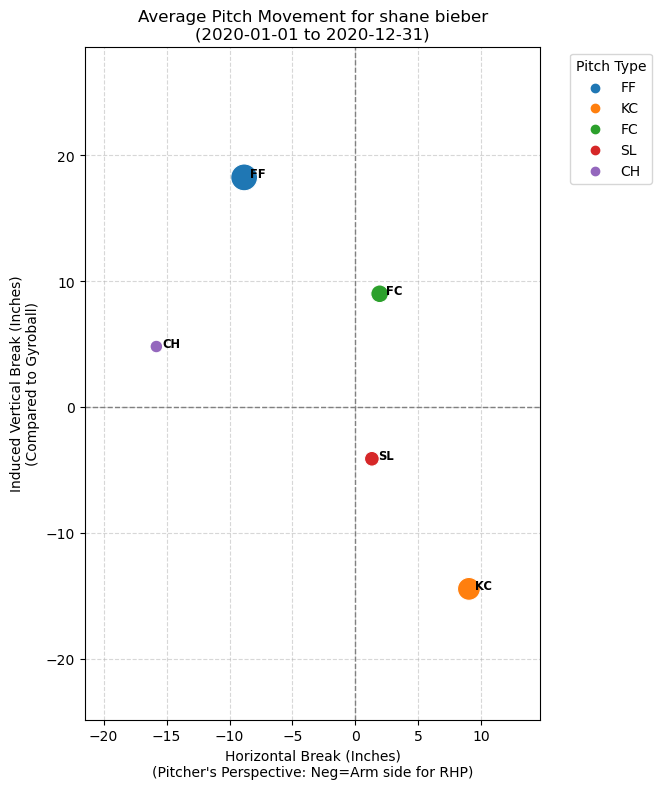

--- End of Block 2 ---


In [20]:
# Block 2: Pitch Arsenal Overview (Corrected to_markdown call)

print("\n--- Block 2: Analyzing Pitch Arsenal ---")

# Check if data was loaded successfully in Block 1
if 'pitcher_statcast_data' in locals() and pitcher_statcast_data is not None and not pitcher_statcast_data.empty and \
   'pitcher_first_name' in locals() and pitcher_first_name:

    # --- Define Required Columns ---
    required_cols = ['pitch_type', 'release_speed', 'pfx_x', 'pfx_z']
    spin_rate_col = 'release_spin_rate'
    has_spin_data = spin_rate_col in pitcher_statcast_data.columns

    if 'pitch_type' not in pitcher_statcast_data.columns:
        print("Error: 'pitch_type' column is required but missing.")
    else:
        # --- Data Preparation ---
        arsenal_data = pitcher_statcast_data[pitcher_statcast_data['pitch_type'].notna()].copy()

        if not arsenal_data.empty:
            print(f"Analyzing {len(arsenal_data)} pitches for arsenal overview...")

            # --- Calculations ---
            total_pitches = len(arsenal_data)
            usage = arsenal_data['pitch_type'].value_counts()
            usage_pct = (usage / total_pitches) * 100

            agg_dict = {
                'Avg Speed (mph)': ('release_speed', 'mean'),
                'Avg Horz Break (in)': ('pfx_x', lambda x: x.mean() * 12), # Convert feet to inches
                'Avg Vert Break (in)': ('pfx_z', lambda x: x.mean() * 12), # Convert feet to inches
                'Count': ('pitch_type', 'count')
            }
            if has_spin_data and arsenal_data[spin_rate_col].notna().any(): # Check if spin col actually has data
                agg_dict['Avg Spin (rpm)'] = (spin_rate_col, 'mean')
                print(f"Found '{spin_rate_col}' data.")
            else:
                print(f"Note: '{spin_rate_col}' column not found or empty, skipping spin rate calculation.")
                has_spin_data = False # Ensure we don't try to display it later

            try:
                 # Handle potential missing numeric columns during agg if checks failed somehow
                 pitch_summary = arsenal_data.groupby('pitch_type', observed=True).agg(
                     **{k:v for k,v in agg_dict.items() if v[0] in arsenal_data.columns} # Only agg if col exists
                 )
            except Exception as e: # Catch other potential agg errors
                 print(f"Error during aggregation: {e}. Cannot generate summary table.")
                 pitch_summary = pd.DataFrame()

            if not pitch_summary.empty:
                # Add Usage Percentage and sort
                pitch_summary['Usage (%)'] = usage_pct
                pitch_summary.sort_values(by='Usage (%)', ascending=False, inplace=True)

                # --- Display Summary Table ---
                title = f"Pitch Arsenal Summary for {pitcher_first_name} {pitcher_last_name} ({start_date} to {end_date})"
                print("\n" + "="*len(title))
                print(title)
                print("="*len(title))

                # Reorder columns for display
                display_cols = ['Usage (%)', 'Count', 'Avg Speed (mph)']
                if has_spin_data and 'Avg Spin (rpm)' in pitch_summary.columns:
                    display_cols.append('Avg Spin (rpm)')
                display_cols.extend(['Avg Horz Break (in)', 'Avg Vert Break (in)'])

                # Ensure display_cols only contains columns that actually exist in pitch_summary
                display_cols = [col for col in display_cols if col in pitch_summary.columns]

                if display_cols: # Only print if there are columns to show
                    # *** MODIFIED HERE: Removed formatters argument ***
                    print(pitch_summary[display_cols].to_markdown(floatfmt=".1f"))
                    # Note: % sign for Usage and +/- for break won't appear in markdown
                else:
                    print("No summary columns available to display.")


                # --- Visualize Movement ---
                # Check if movement columns exist before plotting
                if 'Avg Horz Break (in)' in pitch_summary.columns and 'Avg Vert Break (in)' in pitch_summary.columns:
                    print("\n--- Pitch Movement Plot ---")
                    plt.figure(figsize=(8, 8))
                    sns.scatterplot(
                        data=pitch_summary,
                        x='Avg Horz Break (in)',
                        y='Avg Vert Break (in)',
                        hue=pitch_summary.index,
                        s=pitch_summary['Usage (%)'] * 10,
                        legend='full'
                    )

                    # Add labels to points
                    for i in range(pitch_summary.shape[0]):
                        plt.text(pitch_summary['Avg Horz Break (in)'].iloc[i]+0.5,
                                 pitch_summary['Avg Vert Break (in)'].iloc[i],
                                 pitch_summary.index[i],
                                 horizontalalignment='left', size='small', color='black', weight='semibold')

                    plt.axhline(0, color='grey', linestyle='--', lw=1)
                    plt.axvline(0, color='grey', linestyle='--', lw=1)
                    plt.title(f"Average Pitch Movement for {pitcher_first_name} {pitcher_last_name}\n({start_date} to {end_date})")
                    plt.xlabel("Horizontal Break (Inches)\n(Pitcher's Perspective: Neg=Arm side for RHP)")
                    plt.ylabel("Induced Vertical Break (Inches)\n(Compared to Gyroball)")
                    plt.grid(True, linestyle='--', alpha=0.5)
                    plt.legend(title='Pitch Type', bbox_to_anchor=(1.05, 1), loc='upper left')
                    plt.axis('equal')
                    plt.tight_layout(rect=[0, 0, 0.85, 1])
                    plt.show()
                else:
                    print("\nSkipping movement plot because movement data columns are missing.")

            else:
                 print("Could not generate pitch summary table (aggregation failed or produced empty result).")

        else:
            print("No valid pitch data found to analyze arsenal after initial filtering.")

elif pitcher_statcast_data is None:
    print("Skipping arsenal analysis because pitcher data was not loaded successfully in Block 1.")
else:
     print("Skipping arsenal analysis because the dataset was empty or pitcher/date info is missing.")

print("--- End of Block 2 ---")


--- Block 3: Analyzing Pitch Location and CSW% ---

Part 1: Overall Pitch Location Density
Generating location density plot based on 1343 pitches...


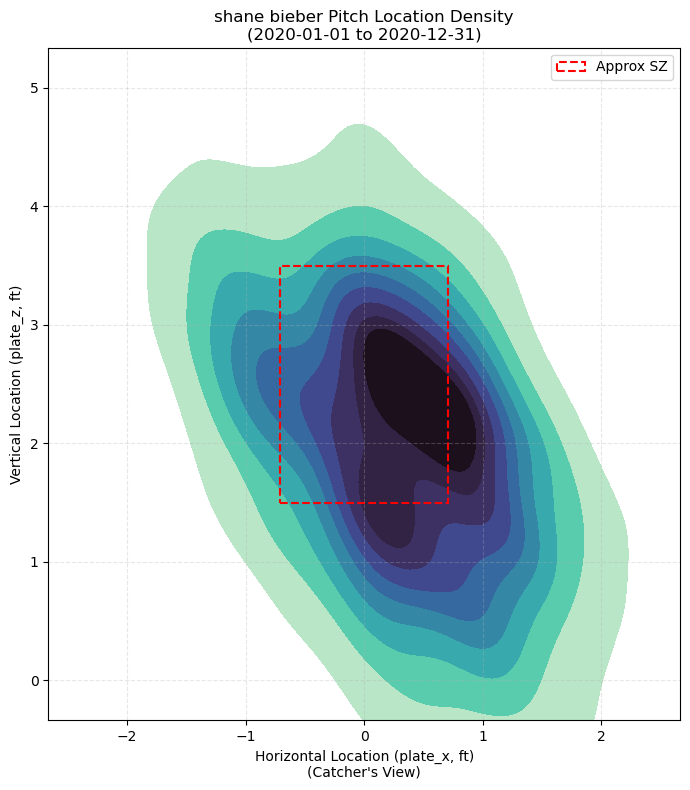


Part 2: Called Strike + Whiff % (CSW%) Heatmap
Calculating CSW% based on 1343 pitches...


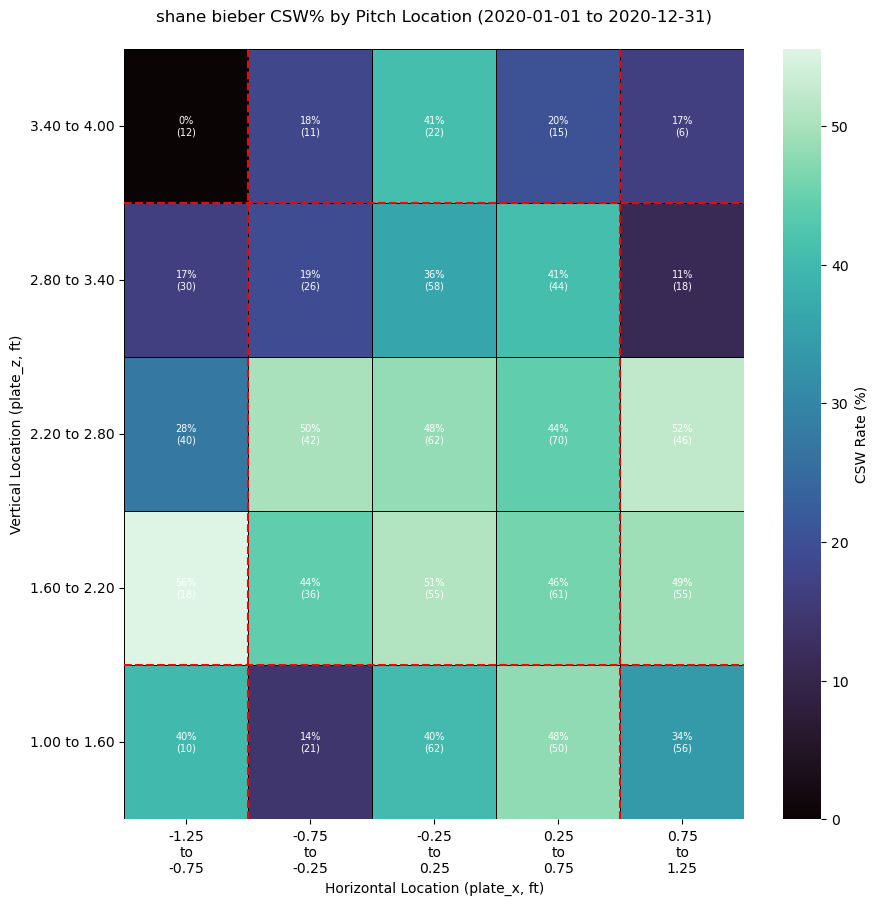

--- End of Block 3 ---


In [52]:
# Block 3: Pitch Location Analysis (Density and CSW% - Final Corrected Version)

print("\n--- Block 3: Analyzing Pitch Location and CSW% ---")

# Check prerequisite data and variables from Block 1
# Ensure variables like pitcher_statcast_data, pitcher_first_name, start_date, end_date exist
if 'pitcher_statcast_data' in locals() and pitcher_statcast_data is not None and not pitcher_statcast_data.empty and \
   'pitcher_first_name' in locals() and pitcher_first_name and \
   'start_date' in locals() and start_date and \
   'end_date' in locals() and end_date:

    # --- Define Required Columns ---
    required_cols_loc = ['plate_x', 'plate_z']
    required_cols_csw = ['plate_x', 'plate_z', 'description']

    # --- Part 1: Overall Pitch Location Density Plot ---
    print("\nPart 1: Overall Pitch Location Density")
    if all(col in pitcher_statcast_data.columns for col in required_cols_loc):
        loc_data = pitcher_statcast_data[
            pitcher_statcast_data['plate_x'].notna() &
            pitcher_statcast_data['plate_z'].notna()
        ].copy()

        if not loc_data.empty:
            print(f"Generating location density plot based on {len(loc_data)} pitches...")
            plt.figure(figsize=(7, 8))
            ax_loc = plt.gca()

            sns.kdeplot(
                data=loc_data,
                x='plate_x',
                y='plate_z',
                fill=True,
                cmap='mako_r',
                thresh=0.05,
                ax=ax_loc
            )

            # Add approximate strike zone overlay
            sz_x_min, sz_x_max = -17/24, 17/24 # Plate width (17in) / 2, converted to feet
            sz_z_min, sz_z_max = 1.5, 3.5     # Approximate vertical zone
            sz_rect = plt.Rectangle((sz_x_min, sz_z_min), (sz_x_max - sz_x_min), (sz_z_max - sz_z_min),
                                    edgecolor='red', linestyle='--', fill=False, linewidth=1.5, label='Approx SZ')
            ax_loc.add_patch(sz_rect)

            plt.axis('equal')
            plt.xlim(-2.5, 2.5)
            plt.ylim(0, 5.0)
            plt.title(f"{pitcher_first_name} {pitcher_last_name} Pitch Location Density\n({start_date} to {end_date})")
            plt.xlabel("Horizontal Location (plate_x, ft)\n(Catcher's View)")
            plt.ylabel("Vertical Location (plate_z, ft)")
            plt.grid(True, linestyle='--', alpha=0.3)
            plt.legend(handles=[sz_rect])
            plt.tight_layout()
            plt.show()

        else:
            print("No pitches with valid location data found to plot density.")
    else:
        missing = [col for col in required_cols_loc if col not in pitcher_statcast_data.columns]
        print(f"Skipping location density plot because required columns are missing: {', '.join(missing)}")


    # --- Part 2: CSW% Heatmap ---
    print("\nPart 2: Called Strike + Whiff % (CSW%) Heatmap")
    if all(col in pitcher_statcast_data.columns for col in required_cols_csw):
        pitch_data_csw = pitcher_statcast_data[
            pitcher_statcast_data['description'].notna() &
            pitcher_statcast_data['plate_x'].notna() &
            pitcher_statcast_data['plate_z'].notna()
        ].copy()

        whiff_descriptions = {'swinging_strike', 'missed_bunt'}
        pitch_data_csw['is_csw'] = (pitch_data_csw['description'] == 'called_strike') | \
                                   (pitch_data_csw['description'].isin(whiff_descriptions))

        if not pitch_data_csw.empty:
            print(f"Calculating CSW% based on {len(pitch_data_csw)} pitches...")
            x_bins = np.linspace(-1.25, 1.25, 6)
            z_bins = np.linspace(1.0, 4.0, 6)
            pitch_data_csw['x_zone_bin'] = pd.cut(pitch_data_csw['plate_x'], bins=x_bins)
            pitch_data_csw['z_zone_bin'] = pd.cut(pitch_data_csw['plate_z'], bins=z_bins)
            pitch_data_csw.dropna(subset=['x_zone_bin', 'z_zone_bin'], inplace=True)

            if not pitch_data_csw.empty:
                zone_csw_stats = pitch_data_csw.groupby(['z_zone_bin', 'x_zone_bin'], observed=False).agg(
                    CSW_Count=('is_csw', 'sum'), TotalPitches=('is_csw', 'count')
                ).reset_index()
                zone_csw_stats['CSW_Rate'] = (zone_csw_stats['CSW_Count'] / zone_csw_stats['TotalPitches']) * 100

                csw_heatmap_data = None; annot_labels_csw = None # Renamed back to original annotation var name
                try:
                    csw_heatmap_data = zone_csw_stats.pivot_table(
                        index='z_zone_bin', columns='x_zone_bin', values='CSW_Rate', observed=False
                    )
                    total_pivot_csw = zone_csw_stats.pivot_table(
                        index='z_zone_bin', columns='x_zone_bin', values='TotalPitches', observed=False, fill_value=0
                    )

                    # Create multi-line annotation labels (Rate%\n(Count))
                    annot_labels_csw = pd.DataFrame(index=csw_heatmap_data.index, columns=csw_heatmap_data.columns, dtype=str)
                    for row_idx in csw_heatmap_data.index:
                        for col_idx in csw_heatmap_data.columns:
                            rate = csw_heatmap_data.loc[row_idx, col_idx]
                            total = total_pivot_csw.loc[row_idx, col_idx]
                            if total > 0 and pd.notna(rate):
                                annot_labels_csw.loc[row_idx, col_idx] = f"{rate:.0f}%\n({total:.0f})" # Rate% (Total Pitches)
                            else:
                                annot_labels_csw.loc[row_idx, col_idx] = f"-\n({total:.0f})" # Show total pitches even if rate is NaN/0

                except Exception as e:
                    print(f"Error creating pivot table or annotations for CSW% heatmap: {e}")
                    csw_heatmap_data = None; annot_labels_csw = None

                # Visualization (Manual Annotations)
                if csw_heatmap_data is not None and not csw_heatmap_data.empty and annot_labels_csw is not None:
                    plt.figure(figsize=(10, 10)) # Kept slightly larger size
                    ax_csw = plt.gca()
                    sns.heatmap(
                        csw_heatmap_data,
                        annot=False, # Set annot to False as we add text manually
                        fmt="",
                        cmap="mako",
                        linewidths=.5, linecolor='k', cbar_kws={'label': 'CSW Rate (%)'},
                        ax=ax_csw, vmin=0
                    )

                    # --- Manually Add Text Annotations --- ## USING MULTI-LINE ##
                    for i in range(csw_heatmap_data.shape[0]): # Loop through rows (0 to 4)
                        for j in range(csw_heatmap_data.shape[1]): # Loop through columns (0 to 4)
                            label = annot_labels_csw.iloc[i, j] # Get multi-line label
                            # Use heatmap cell centers (j+0.5, i+0.5) for coordinates
                            ax_csw.text(j + 0.5, i + 0.5, label,
                                        ha='center', va='center', color='white', fontsize=7) # Kept small font
                    # ------------------------------------

                    # Add Strike Zone lines
                    ax_csw.axvline(1, color='red', linestyle='--', lw=1.5); ax_csw.axvline(4, color='red', linestyle='--', lw=1.5)
                    ax_csw.axhline(1, color='red', linestyle='--', lw=1.5); ax_csw.axhline(4, color='red', linestyle='--', lw=1.5)

                    # Set Ticks and Labels
                    x_tick_labels = [f"{b.left:.2f}\nto\n{b.right:.2f}" for b in csw_heatmap_data.columns]
                    z_tick_labels = [f"{b.left:.2f} to {b.right:.2f}" for b in csw_heatmap_data.index]
                    plt.xticks(ticks=np.arange(len(csw_heatmap_data.columns)) + 0.5, labels=x_tick_labels, rotation=0)
                    plt.yticks(ticks=np.arange(len(csw_heatmap_data.index)) + 0.5, labels=z_tick_labels, rotation=0)
                    ax_csw.invert_yaxis() # Put low zones at the bottom

                    plt.xlabel("Horizontal Location (plate_x, ft)")
                    plt.ylabel("Vertical Location (plate_z, ft)")
                    plot_title = f"{pitcher_first_name} {pitcher_last_name} CSW% by Pitch Location ({start_date} to {end_date})"
                    plt.title(plot_title, pad=20)
                    # Keep tight_layout commented out as it might interfere
                    plt.show()
                else:
                     print("No CSW% data available to plot heatmap after binning and pivoting.")
            else:
                 print("No pitches found within the defined 5x5 grid boundaries for CSW% map.")
        else:
            print("No valid pitch data found to calculate CSW%.")
    else:
        missing = [col for col in required_cols_csw if col not in pitcher_statcast_data.columns]
        print(f"Skipping CSW% analysis because required columns are missing: {', '.join(missing)}")

elif pitcher_statcast_data is None:
    print("Skipping location analysis because pitcher data was not loaded successfully in Block 1.")
else:
     print("Skipping location analysis because the dataset was empty or pitcher/date info is missing.")

print("--- End of Block 3 ---")


--- Block 4: Analyzing Pitcher Plate Discipline Induced ---
Calculating discipline metrics based on 1343 pitches...

Opponent Plate Discipline Summary vs shane bieber (2020-01-01 to 2020-12-31)
Pitches Analyzed           1343
Opponent Swing %          43.0%
Opp. Zone Swing %         64.3%
Opp. Chase % (O-Swing)    28.0%
Opp. Contact %            69.0%
Opp. Zone Contact %       81.8%
Opp. Outside Contact %    48.4%
Whiff % (per swing)       31.0%
CSW % (per pitch)         29.9%

--- Whiff% per Swing by Pitch Type ---


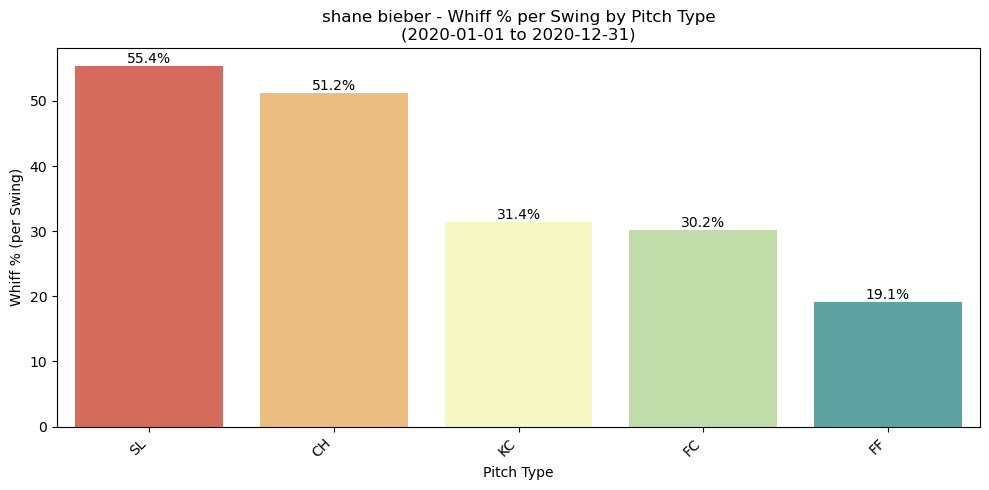


--- Rolling 100-Pitch CSW% ---


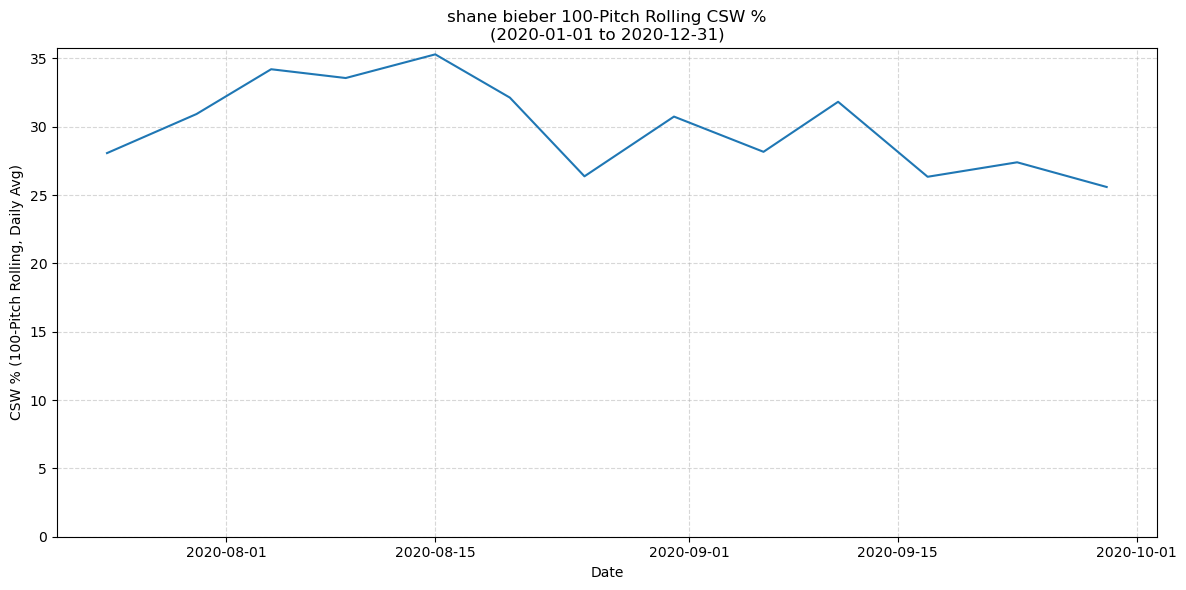

--- End of Block 4 ---


In [38]:
# Block 4: Inducing Swings & Misses (Pitcher Plate Discipline)

print("\n--- Block 4: Analyzing Pitcher Plate Discipline Induced ---")

# Check prerequisite data and variables from Block 1
if 'pitcher_statcast_data' in locals() and pitcher_statcast_data is not None and not pitcher_statcast_data.empty and \
   'pitcher_first_name' in locals() and pitcher_first_name and \
   'start_date' in locals() and start_date and \
   'end_date' in locals() and end_date:

    # --- Define Required Columns ---
    required_cols = ['description', 'zone', 'game_date', 'pitch_type'] # Need pitch_type for breakdown

    # Check if all required columns exist
    if all(col in pitcher_statcast_data.columns for col in required_cols):

        # --- Data Preparation ---
        # 1. Filter for pitches with valid description and zone
        pitch_data_pd = pitcher_statcast_data[
            pitcher_statcast_data['description'].notna() &
            pitcher_statcast_data['zone'].notna() &
            pitcher_statcast_data['game_date'].notna() & # Needed for rolling plot
            pitcher_statcast_data['pitch_type'].notna()  # Needed for breakdown plot
        ].copy()

        # 2. Define event descriptions
        swing_descriptions = {
            'hit_into_play', 'foul', 'swinging_strike', 'foul_tip',
            'foul_bunt', 'missed_bunt', 'hit_into_play_no_out', 'hit_into_play_score'
        }
        whiff_descriptions = {'swinging_strike', 'missed_bunt'}

        if not pitch_data_pd.empty:
            # 3. Create boolean columns
            pitch_data_pd['is_swing'] = pitch_data_pd['description'].isin(swing_descriptions)
            pitch_data_pd['is_whiff'] = pitch_data_pd['description'].isin(whiff_descriptions)
            pitch_data_pd['is_contact'] = pitch_data_pd['is_swing'] & (~pitch_data_pd['is_whiff'])
            pitch_data_pd['is_in_zone'] = (pitch_data_pd['zone'] >= 1) & (pitch_data_pd['zone'] <= 9)
            pitch_data_pd['is_out_of_zone'] = pitch_data_pd['zone'] >= 11
            pitch_data_pd['is_csw'] = (pitch_data_pd['description'] == 'called_strike') | pitch_data_pd['is_whiff']

            print(f"Calculating discipline metrics based on {len(pitch_data_pd)} pitches...")

            # --- Calculate Aggregate Counts & Rates for Table ---
            total_pitches = len(pitch_data_pd)
            total_swings = pitch_data_pd['is_swing'].sum()
            total_contact = pitch_data_pd['is_contact'].sum()
            total_whiffs = pitch_data_pd['is_whiff'].sum()
            total_csw = pitch_data_pd['is_csw'].sum()

            pitches_in_zone = pitch_data_pd['is_in_zone'].sum()
            swings_in_zone = pitch_data_pd.loc[pitch_data_pd['is_in_zone'], 'is_swing'].sum()
            contact_in_zone = pitch_data_pd.loc[pitch_data_pd['is_in_zone'], 'is_contact'].sum()

            pitches_out_zone = pitch_data_pd['is_out_of_zone'].sum()
            swings_out_zone = pitch_data_pd.loc[pitch_data_pd['is_out_of_zone'], 'is_swing'].sum()
            contact_out_zone = pitch_data_pd.loc[pitch_data_pd['is_out_of_zone'], 'is_contact'].sum()

            # Calculate Rates (Handle Division by Zero)
            opp_swing_rate = (total_swings / total_pitches * 100) if total_pitches > 0 else np.nan
            opp_contact_rate = (total_contact / total_swings * 100) if total_swings > 0 else np.nan
            opp_whiff_rate = (total_whiffs / total_swings * 100) if total_swings > 0 else np.nan # SwStr% per swing

            opp_zone_swing_rate = (swings_in_zone / pitches_in_zone * 100) if pitches_in_zone > 0 else np.nan
            opp_zone_contact_rate = (contact_in_zone / swings_in_zone * 100) if swings_in_zone > 0 else np.nan

            opp_chase_rate = (swings_out_zone / pitches_out_zone * 100) if pitches_out_zone > 0 else np.nan
            opp_o_contact_rate = (contact_out_zone / swings_out_zone * 100) if swings_out_zone > 0 else np.nan

            csw_rate = (total_csw / total_pitches * 100) if total_pitches > 0 else np.nan # CSW% per pitch

            # --- Create & Print Summary Table ---
            disc_metrics_dict = {
                "Pitches Analyzed": f"{total_pitches:.0f}",
                "Opponent Swing %": f"{opp_swing_rate:.1f}%" if pd.notna(opp_swing_rate) else "N/A",
                "Opp. Zone Swing %": f"{opp_zone_swing_rate:.1f}%" if pd.notna(opp_zone_swing_rate) else "N/A",
                "Opp. Chase % (O-Swing)": f"{opp_chase_rate:.1f}%" if pd.notna(opp_chase_rate) else "N/A",
                "Opp. Contact %": f"{opp_contact_rate:.1f}%" if pd.notna(opp_contact_rate) else "N/A",
                "Opp. Zone Contact %": f"{opp_zone_contact_rate:.1f}%" if pd.notna(opp_zone_contact_rate) else "N/A",
                "Opp. Outside Contact %": f"{opp_o_contact_rate:.1f}%" if pd.notna(opp_o_contact_rate) else "N/A",
                "Whiff % (per swing)": f"{opp_whiff_rate:.1f}%" if pd.notna(opp_whiff_rate) else "N/A",
                "CSW % (per pitch)": f"{csw_rate:.1f}%" if pd.notna(csw_rate) else "N/A",
            }
            metrics_summary_pd = pd.Series(disc_metrics_dict)
            title_table = f"Opponent Plate Discipline Summary vs {pitcher_first_name} {pitcher_last_name} ({start_date} to {end_date})"
            print("\n" + "="*len(title_table))
            print(title_table)
            print("="*len(title_table))
            print(metrics_summary_pd.to_string())

            # --- Whiff% by Pitch Type Visualization ---
            swing_data_pd = pitch_data_pd[pitch_data_pd['is_swing'] == True].copy()
            if not swing_data_pd.empty:
                print("\n--- Whiff% per Swing by Pitch Type ---")
                whiff_rate_by_pitch = swing_data_pd.groupby('pitch_type', observed=True)['is_whiff'].mean() * 100
                whiff_rate_by_pitch = whiff_rate_by_pitch.sort_values(ascending=False)

                plt.figure(figsize=(10, 5))
                ax_whiff_pt = sns.barplot(
                    x=whiff_rate_by_pitch.index,
                    y=whiff_rate_by_pitch.values,
                    palette='Spectral'
                )
                ax_whiff_pt.bar_label(ax_whiff_pt.containers[0], fmt='%.1f%%') # Add labels to bars
                plt.title(f"{pitcher_first_name} {pitcher_last_name} - Whiff % per Swing by Pitch Type\n({start_date} to {end_date})")
                plt.xlabel("Pitch Type")
                plt.ylabel("Whiff % (per Swing)")
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            else:
                print("\nNo swings found to calculate Whiff% by Pitch Type.")

            # --- Rolling CSW% Visualization ---
            # Ensure date is datetime and sorted
            pitch_data_pd['game_date'] = pd.to_datetime(pitch_data_pd['game_date'])
            pitch_data_pd.sort_values(by='game_date', inplace=True)

            window_size_csw = 100 # Rolling window based on total pitches
            min_periods_csw = window_size_csw // 2

            if len(pitch_data_pd) >= window_size_csw:
                print(f"\n--- Rolling {window_size_csw}-Pitch CSW% ---")
                rolling_csw_col = f'rolling_csw_{window_size_csw}'
                pitch_data_pd[rolling_csw_col] = pitch_data_pd['is_csw'].rolling(
                    window=window_size_csw, min_periods=min_periods_csw
                ).mean() * 100

                # Aggregate by date for plotting
                daily_rolling_csw = pitch_data_pd.groupby('game_date')[rolling_csw_col].mean().reset_index()

                plt.figure(figsize=(12, 6))
                sns.lineplot(data=daily_rolling_csw, x='game_date', y=rolling_csw_col)
                plt.title(f"{pitcher_first_name} {pitcher_last_name} {window_size_csw}-Pitch Rolling CSW %\n({start_date} to {end_date})")
                plt.xlabel("Date")
                plt.ylabel(f"CSW % ({window_size_csw}-Pitch Rolling, Daily Avg)")
                plt.ylim(bottom=0)
                plt.grid(True, linestyle='--', alpha=0.5)
                plt.tight_layout()
                plt.show()
            else:
                 print(f"\nNot enough pitch data ({len(pitch_data_pd)}) to calculate a {window_size_csw}-pitch rolling CSW%.")

        else:
            print(f"No valid pitch data found for {pitcher_first_name} {pitcher_last_name} "
                  f"in the period {start_date} to {end_date}.")
    else:
        # Required columns missing
        missing = [col for col in required_cols if col not in pitcher_statcast_data.columns]
        print(f"Skipping plate discipline analysis because required columns are missing: {', '.join(missing)}")

elif pitcher_statcast_data is None:
    print("Skipping plate discipline analysis because pitcher data was not loaded successfully in Block 1.")
else: # Case where data is loaded but empty, or other variables missing
     print("Skipping plate discipline analysis because the dataset was empty or pitcher/date info is missing.")

print("--- End of Block 4 ---")

In [55]:
def is_barrel(launch_speed, launch_angle):
    """
    Determines if a batted ball is a Statcast Barrel based on approximate criteria.

    Args:
        launch_speed (float): Exit velocity in mph.
        launch_angle (float): Launch angle in degrees.

    Returns:
        bool: True if the batted ball is a Barrel, False otherwise.
    """
    # Ensure input are numeric, return False if not
    if pd.isna(launch_speed) or pd.isna(launch_angle):
        return False

    # Check minimum EV
    if launch_speed < 98:
        return False

    # Define LA bounds based on EV
    min_la_barrel = 0.0
    max_la_barrel = 0.0

    if launch_speed >= 116:
        min_la_barrel = 8.0
        max_la_barrel = 50.0
    elif launch_speed >= 100:
        # Linear interpolation between (100 mph, LA 24-33) and (116 mph, LA 8-50)
        # Lower bound slope: (8 - 24) / (116 - 100) = -1
        # Upper bound slope: (50 - 33) / (116 - 100) = 1.0625
        min_la_barrel = 24.0 - (launch_speed - 100.0) * 1.0
        max_la_barrel = 33.0 + (launch_speed - 100.0) * 1.0625
    elif launch_speed == 99:
        min_la_barrel = 25.0
        max_la_barrel = 31.0
    elif launch_speed == 98:
        min_la_barrel = 26.0
        max_la_barrel = 30.0
    else: # Should not happen based on initial check, but good practice
        return False

    # Check if launch angle is within the calculated bounds
    return (launch_angle >= min_la_barrel) and (launch_angle <= max_la_barrel)

print("Helper function is_barrel defined.")

Helper function is_barrel defined.



--- Block 5: Analyzing Contact Quality Allowed ---

Calculating contact quality based on 320 batted balls allowed...

Contact Quality Allowed Summary for shane bieber (2020-01-01 to 2020-12-31)
Batted Balls Allowed        320.0
Avg EV Allowed (mph)         82.9
Max EV Allowed (mph)        112.9
Avg LA Allowed (deg)         12.1
Hard Hit Rate Allowed (%)    27.2
Barrel Rate Allowed (%)       4.1

--- Exit Velocity vs Launch Angle Allowed Plot ---


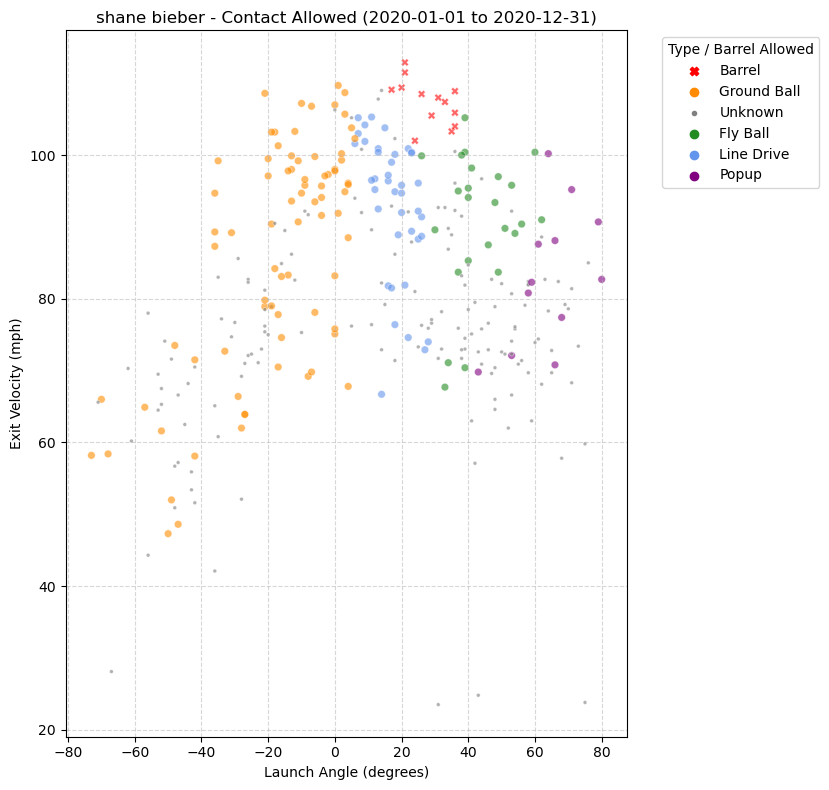


--- Rolling 50-BBE Hard Hit Rate Allowed ---


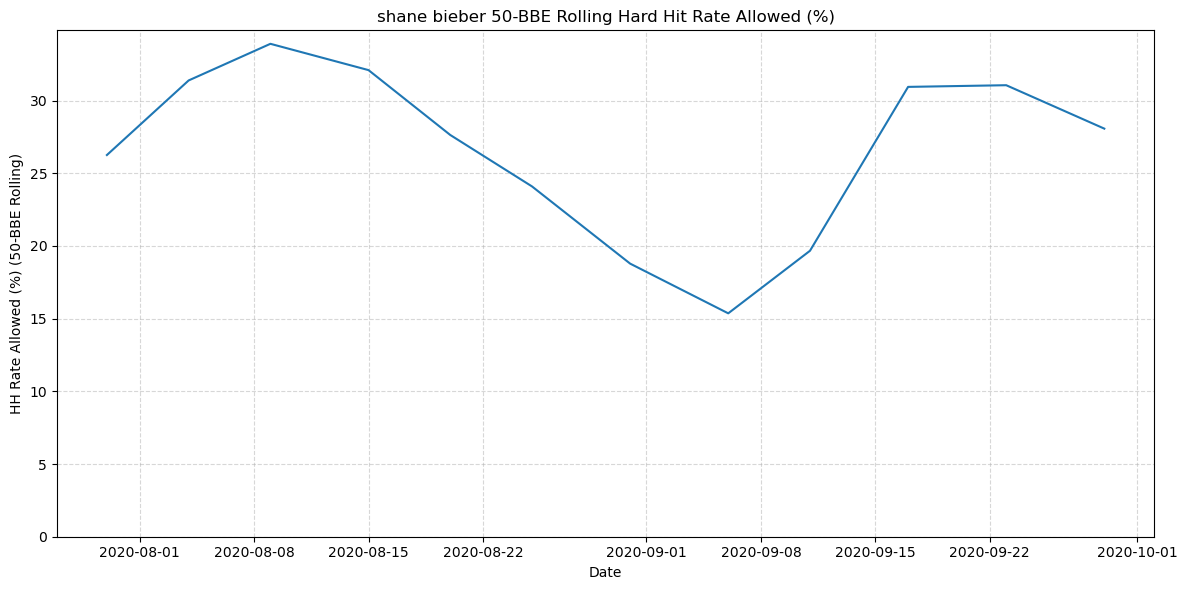


--- Rolling 50-BBE Barrel Rate Allowed ---


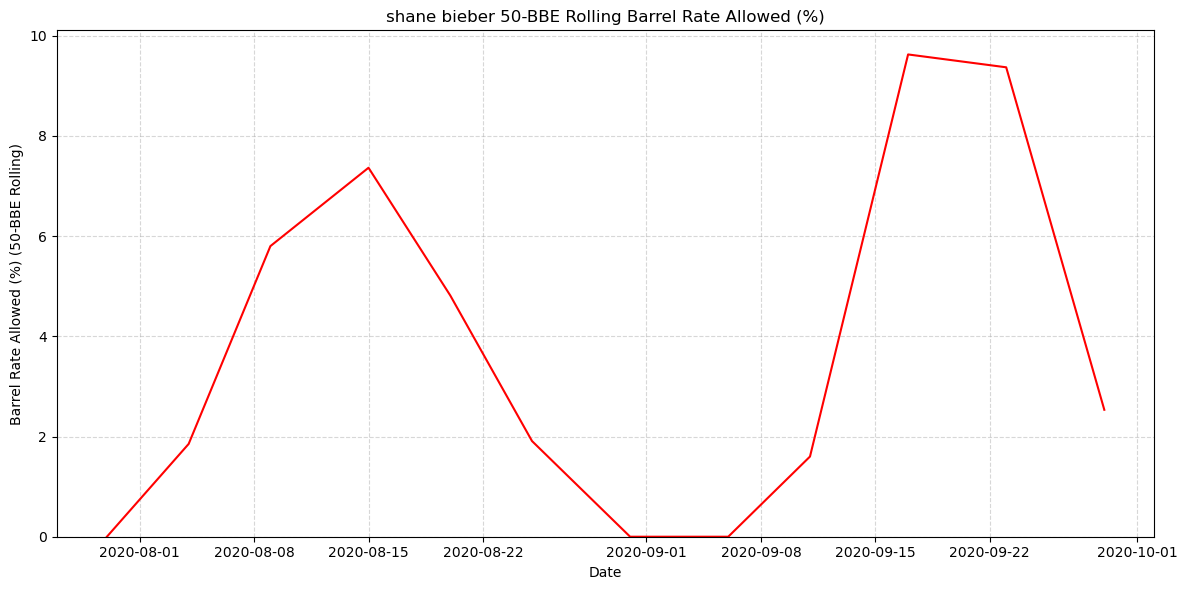

--- End of Block 5 ---


In [57]:
# Block 5: Contact Quality Allowed

print("\n--- Block 5: Analyzing Contact Quality Allowed ---")

# --- Define is_barrel function if not already defined ---
# (Copied from batter notebook Block 7a - run this part if needed)
if 'is_barrel' not in locals() and 'is_barrel' not in globals():
    print("Defining 'is_barrel' helper function...")
    import pandas as pd # Ensure pandas is available for isna
    import numpy as np # Ensure numpy is available for nan

    def is_barrel(launch_speed, launch_angle):
        """
        Determines if a batted ball is a Statcast Barrel based on approximate criteria.
        Args: launch_speed (float), launch_angle (float)
        Returns: bool
        """
        if pd.isna(launch_speed) or pd.isna(launch_angle): return False
        if launch_speed < 98: return False
        min_la_barrel = 0.0; max_la_barrel = 0.0
        if launch_speed >= 116:
            min_la_barrel = 8.0; max_la_barrel = 50.0
        elif launch_speed >= 100:
            min_la_barrel = 24.0 - (launch_speed - 100.0) * 1.0
            max_la_barrel = 33.0 + (launch_speed - 100.0) * 1.0625
        elif launch_speed == 99:
            min_la_barrel = 25.0; max_la_barrel = 31.0
        elif launch_speed == 98:
            min_la_barrel = 26.0; max_la_barrel = 30.0
        else: return False
        return (launch_angle >= min_la_barrel) and (launch_angle <= max_la_barrel)
    print("'is_barrel' function defined.")
# ---------------------------------------------------------


# Check prerequisite data and variables from Block 1
if 'pitcher_statcast_data' in locals() and pitcher_statcast_data is not None and not pitcher_statcast_data.empty and \
   'pitcher_first_name' in locals() and pitcher_first_name and \
   'start_date' in locals() and start_date and \
   'end_date' in locals() and end_date:

    # --- Define Required Columns ---
    required_cols = ['launch_speed', 'launch_angle', 'bb_type', 'game_date']

    # Check if all required columns exist
    if all(col in pitcher_statcast_data.columns for col in required_cols):

        # --- Data Preparation: Filter for Batted Balls ---
        batted_ball_data_contact = pitcher_statcast_data[
            pitcher_statcast_data['launch_speed'].notna() &
            pitcher_statcast_data['launch_angle'].notna() &
            pitcher_statcast_data['game_date'].notna() # Needed for rolling plots
        ].copy()

        if not batted_ball_data_contact.empty:
            print(f"\nCalculating contact quality based on {len(batted_ball_data_contact)} batted balls allowed...")

            # --- Calculate Summary Metrics ---
            contact_metrics = {}
            contact_metrics["Batted Balls Allowed"] = len(batted_ball_data_contact)
            contact_metrics["Avg EV Allowed (mph)"] = batted_ball_data_contact['launch_speed'].mean()
            contact_metrics["Max EV Allowed (mph)"] = batted_ball_data_contact['launch_speed'].max()
            contact_metrics["Avg LA Allowed (deg)"] = batted_ball_data_contact['launch_angle'].mean()

            # Hard Hit Rate Allowed
            hard_hit_threshold = 95.0
            batted_ball_data_contact['is_hard_hit_allowed'] = batted_ball_data_contact['launch_speed'] >= hard_hit_threshold
            contact_metrics[f"Hard Hit Rate Allowed (%)"] = batted_ball_data_contact['is_hard_hit_allowed'].mean() * 100

            # Barrel Rate Allowed
            try:
                if 'is_barrel' in globals() and callable(globals()['is_barrel']):
                     batted_ball_data_contact['is_barrel_allowed'] = batted_ball_data_contact.apply(
                         lambda row: is_barrel(row['launch_speed'], row['launch_angle']), axis=1
                     )
                     contact_metrics["Barrel Rate Allowed (%)"] = batted_ball_data_contact['is_barrel_allowed'].mean() * 100
                else:
                    contact_metrics["Barrel Rate Allowed (%)"] = np.nan
                    print("Warning: 'is_barrel' function not defined. Cannot calculate Barrel Rate Allowed.")
            except Exception as e:
                 contact_metrics["Barrel Rate Allowed (%)"] = np.nan
                 print(f"Warning: Error calculating barrel rate allowed - {e}")

            # --- Display Summary Table ---
            summary_series_contact = pd.Series(contact_metrics)
            title_contact = f"Contact Quality Allowed Summary for {pitcher_first_name} {pitcher_last_name} ({start_date} to {end_date})"
            print("\n" + "="*len(title_contact))
            print(title_contact)
            print("="*len(title_contact))
            print(summary_series_contact.to_string(float_format="%.1f"))


            # --- EV vs LA Scatter Plot ---
            print("\n--- Exit Velocity vs Launch Angle Allowed Plot ---")
            # Create category for plotting barrels vs other types
            if 'is_barrel_allowed' in batted_ball_data_contact.columns: # Check if barrel calc succeeded
                 def assign_contact_category(row):
                      if row['is_barrel_allowed']: return "Barrel"
                      elif pd.notna(row['bb_type']): return row['bb_type'].replace('_',' ').title()
                      else: return "Unknown"
                 batted_ball_data_contact['contact_category'] = batted_ball_data_contact.apply(assign_contact_category, axis=1)
                 hue_col, style_col = 'contact_category', 'contact_category' # Color/style by barrel/bb_type
                 markers = {"Barrel": "X", "Line Drive": "o", "Fly Ball": "o", "Ground Ball": "o", "Popup": "o", "Unknown": "."}
                 palette = {"Barrel": "red", "Line Drive": "cornflowerblue", "Fly Ball": "forestgreen", "Ground Ball": "darkorange", "Popup": "purple", "Unknown": "grey"}
                 present_cats = batted_ball_data_contact['contact_category'].unique()
                 plot_palette = {k: v for k, v in palette.items() if k in present_cats}
                 plot_markers = {k: v for k, v in markers.items() if k in present_cats}
                 legend_title = "Type / Barrel Allowed"
            else:
                 # Fallback if barrel calc failed: just use bb_type
                 batted_ball_data_contact['contact_category'] = batted_ball_data_contact['bb_type'].fillna("Unknown").str.replace('_',' ').str.title()
                 hue_col, style_col = 'contact_category', None # Just color by bb_type
                 plot_palette = sns.color_palette("tab10", n_colors=batted_ball_data_contact['contact_category'].nunique()) # Default palette
                 plot_markers = None # Default markers
                 legend_title = "Batted Ball Type"


            plt.figure(figsize=(10, 8))
            sns.scatterplot(
                data=batted_ball_data_contact,
                x='launch_angle', y='launch_speed',
                hue=hue_col, style=style_col,
                palette=plot_palette, markers=plot_markers,
                s=30, alpha=0.6
            )
            plt.title(f"{pitcher_first_name} {pitcher_last_name} - Contact Allowed ({start_date} to {end_date})")
            plt.xlabel("Launch Angle (degrees)"); plt.ylabel("Exit Velocity (mph)")
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout(rect=[0, 0, 0.85, 1]); plt.show()


            # --- Rolling Plots ---
            # Ensure game_date is datetime and sort chronologically
            batted_ball_data_contact['game_date'] = pd.to_datetime(batted_ball_data_contact['game_date'])
            batted_ball_data_contact.sort_values(by='game_date', inplace=True)
            window_size_contact = 50 # Rolling window size (BBE)

            # Rolling Hard Hit Rate Allowed
            if len(batted_ball_data_contact) >= window_size_contact:
                print(f"\n--- Rolling {window_size_contact}-BBE Hard Hit Rate Allowed ---")
                rolling_hh_col = f'rolling_hhr_allowed_{window_size_contact}'
                batted_ball_data_contact[rolling_hh_col] = batted_ball_data_contact['is_hard_hit_allowed'].rolling(
                    window=window_size_contact, min_periods=window_size_contact // 2).mean() * 100
                daily_rolling_hh = batted_ball_data_contact.groupby('game_date')[rolling_hh_col].mean().reset_index()

                plt.figure(figsize=(12, 6))
                sns.lineplot(data=daily_rolling_hh, x='game_date', y=rolling_hh_col)
                plt.title(f"{pitcher_first_name} {pitcher_last_name} {window_size_contact}-BBE Rolling Hard Hit Rate Allowed (%)")
                plt.xlabel("Date"); plt.ylabel(f"HH Rate Allowed (%) ({window_size_contact}-BBE Rolling)"); plt.ylim(bottom=0)
                plt.grid(True, linestyle='--', alpha=0.5); plt.tight_layout(); plt.show()
            else:
                print(f"\nNot enough batted ball data ({len(batted_ball_data_contact)}) for {window_size_contact}-BBE rolling Hard Hit Rate.")

            # Rolling Barrel Rate Allowed
            if 'is_barrel_allowed' in batted_ball_data_contact.columns and len(batted_ball_data_contact) >= window_size_contact:
                 print(f"\n--- Rolling {window_size_contact}-BBE Barrel Rate Allowed ---")
                 rolling_brl_col = f'rolling_brl_allowed_{window_size_contact}'
                 batted_ball_data_contact[rolling_brl_col] = batted_ball_data_contact['is_barrel_allowed'].rolling(
                     window=window_size_contact, min_periods=window_size_contact // 2).mean() * 100
                 daily_rolling_brl = batted_ball_data_contact.groupby('game_date')[rolling_brl_col].mean().reset_index()

                 plt.figure(figsize=(12, 6))
                 sns.lineplot(data=daily_rolling_brl, x='game_date', y=rolling_brl_col, color='red') # Different color
                 plt.title(f"{pitcher_first_name} {pitcher_last_name} {window_size_contact}-BBE Rolling Barrel Rate Allowed (%)")
                 plt.xlabel("Date"); plt.ylabel(f"Barrel Rate Allowed (%) ({window_size_contact}-BBE Rolling)"); plt.ylim(bottom=0)
                 plt.grid(True, linestyle='--', alpha=0.5); plt.tight_layout(); plt.show()
            elif 'is_barrel_allowed' in batted_ball_data_contact.columns: # Enough data check failed
                 print(f"\nNot enough batted ball data ({len(batted_ball_data_contact)}) for {window_size_contact}-BBE rolling Barrel Rate.")
            # else barrel rate was not calculated due to missing function/error

        else:
            print(f"No batted balls with launch speed and launch angle data found for {pitcher_first_name} {pitcher_last_name} "
                  f"in the period {start_date} to {end_date}.")
    else:
        # Required columns missing
        missing = [col for col in required_cols if col not in pitcher_statcast_data.columns]
        print(f"Skipping contact quality analysis because required columns are missing: {', '.join(missing)}")

elif pitcher_statcast_data is None:
    print("Skipping contact quality analysis because pitcher data was not loaded successfully in Block 1.")
else: # Case where data is loaded but empty, or other variables missing
     print("Skipping contact quality analysis because the dataset was empty or pitcher/date info is missing.")

print("--- End of Block 5 ---")


--- Block 6: Analyzing Performance Outcomes ---
All required columns found.

Part 1: Preparing data for 50-Event Rolling wOBA vs xwOBA Allowed...
Calculating and plotting Rolling wOBA vs xwOBA Allowed...


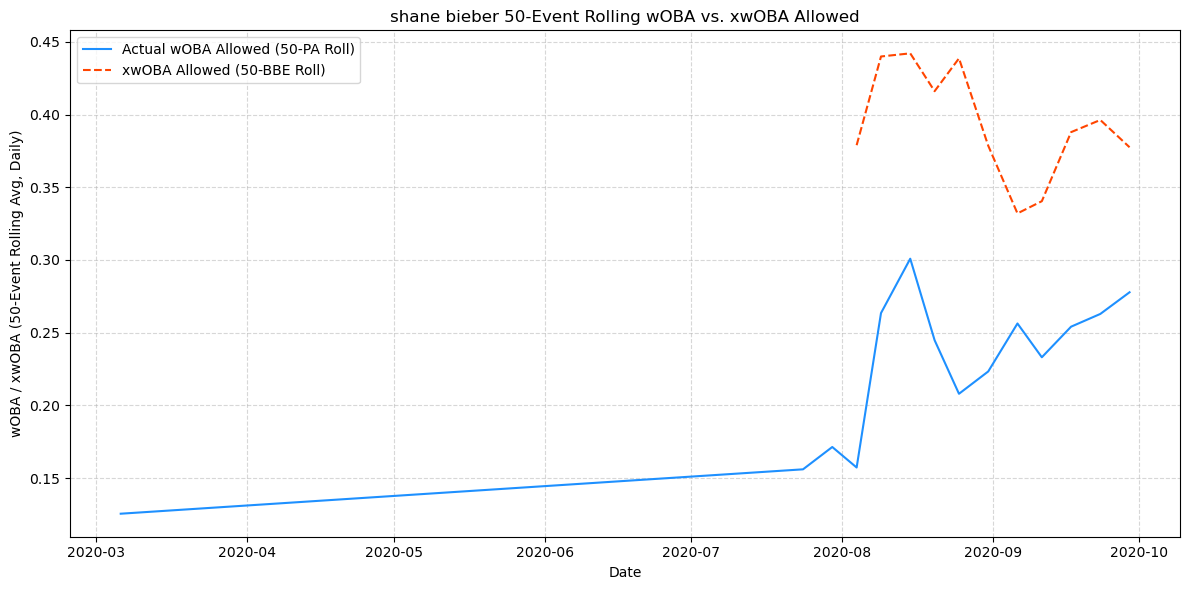


Part 2: Preparing data for 50-PA Rolling K% and BB%...
Calculating and plotting 50-PA Rolling K% and BB%...


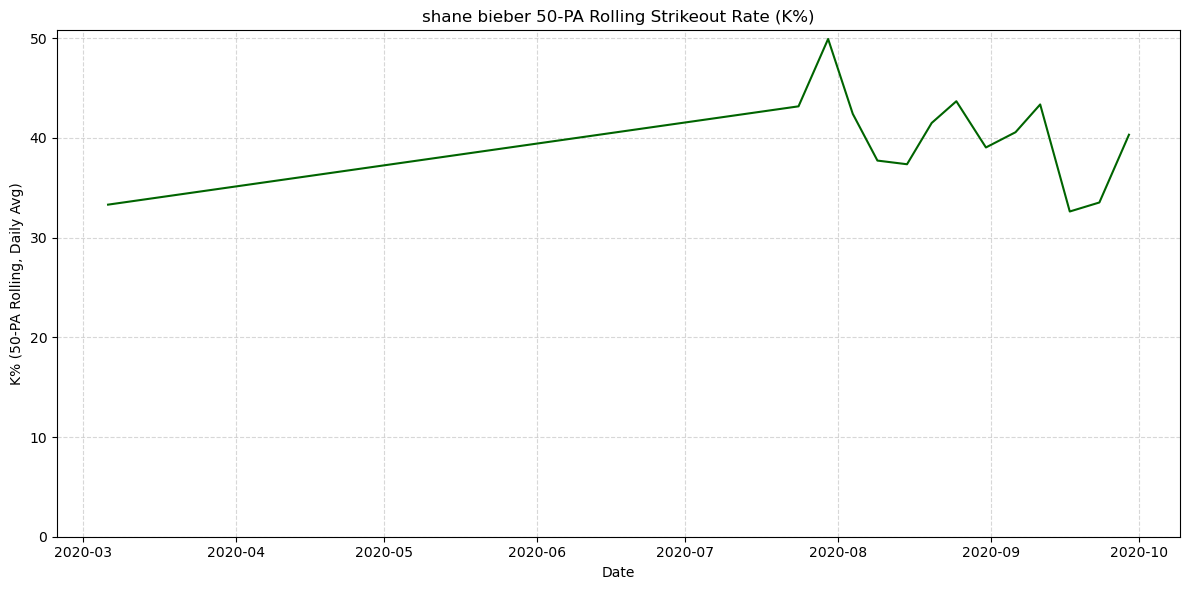

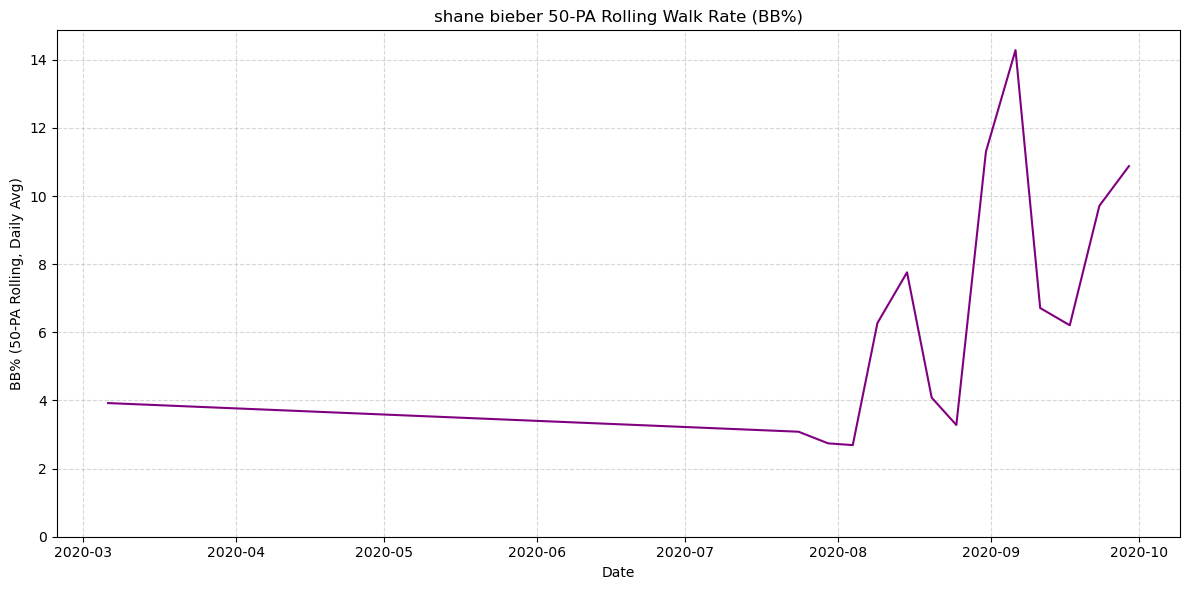

--- End of Block 6 ---


In [59]:
# Block 6: Performance Outcomes (Rolling wOBA/xwOBA, K%, BB%)

print("\n--- Block 6: Analyzing Performance Outcomes ---")

# Check prerequisite data and variables from Block 1
if 'pitcher_statcast_data' in locals() and pitcher_statcast_data is not None and not pitcher_statcast_data.empty and \
   'pitcher_first_name' in locals() and pitcher_first_name and \
   'start_date' in locals() and start_date and \
   'end_date' in locals() and end_date:

    # --- Define Columns ---
    woba_col = 'woba_value' # Actual wOBA based on PA outcome
    xwoba_col = 'estimated_woba_using_speedangle' # Expected wOBA based on contact quality
    required_cols = [woba_col, xwoba_col, 'game_date', 'launch_speed', 'launch_angle', 'events',
                     'game_pk', 'at_bat_number'] # Need PA identifiers

    # Check if all required columns exist
    if all(col in pitcher_statcast_data.columns for col in required_cols):
        print("All required columns found.")

        # Define window size for rolling averages
        window_size = 50 # Use same window size (e.g., 50 events - PAs or BBEs)
        min_periods_calc = window_size // 2

        # --- Part 1: Rolling wOBA vs xwOBA Allowed ---
        print(f"\nPart 1: Preparing data for {window_size}-Event Rolling wOBA vs xwOBA Allowed...")
        # Prep Data for Rolling Actual wOBA
        pa_data_woba = pitcher_statcast_data[
            pitcher_statcast_data[woba_col].notna() &
            pitcher_statcast_data['game_date'].notna()
        ].copy()
        pa_data_woba['game_date'] = pd.to_datetime(pa_data_woba['game_date'])
        pa_data_woba.sort_values(by='game_date', inplace=True)

        # Prep Data for Rolling xwOBA
        batted_ball_data_rxwoba = pitcher_statcast_data[
            pitcher_statcast_data['launch_speed'].notna() &
            pitcher_statcast_data['launch_angle'].notna() &
            pitcher_statcast_data[xwoba_col].notna() &
            pitcher_statcast_data['game_date'].notna()
        ].copy()
        batted_ball_data_rxwoba['game_date'] = pd.to_datetime(batted_ball_data_rxwoba['game_date'])
        batted_ball_data_rxwoba.sort_values(by='game_date', inplace=True)

        can_calc_woba = len(pa_data_woba) >= window_size
        can_calc_xwoba = len(batted_ball_data_rxwoba) >= window_size

        if can_calc_woba and can_calc_xwoba:
            print("Calculating and plotting Rolling wOBA vs xwOBA Allowed...")
            # Calculate Rolling Averages
            rolling_woba_col = f'rolling_woba_allowed_{window_size}'
            rolling_xwoba_col = f'rolling_xwoba_allowed_{window_size}'
            pa_data_woba[rolling_woba_col] = pa_data_woba[woba_col].rolling(
                window=window_size, min_periods=min_periods_calc).mean()
            batted_ball_data_rxwoba[rolling_xwoba_col] = batted_ball_data_rxwoba[xwoba_col].rolling(
                window=window_size, min_periods=min_periods_calc).mean()

            # Aggregate daily
            daily_rolling_woba = pa_data_woba.groupby('game_date')[rolling_woba_col].mean().reset_index()
            daily_rolling_xwoba = batted_ball_data_rxwoba.groupby('game_date')[rolling_xwoba_col].mean().reset_index()

            # Visualization
            plt.figure(figsize=(12, 6))
            ax1 = plt.gca()
            sns.lineplot(data=daily_rolling_woba, x='game_date', y=rolling_woba_col, ax=ax1,
                         label=f'Actual wOBA Allowed ({window_size}-PA Roll)', color='dodgerblue')
            sns.lineplot(data=daily_rolling_xwoba, x='game_date', y=rolling_xwoba_col, ax=ax1,
                         label=f'xwOBA Allowed ({window_size}-BBE Roll)', color='orangered', linestyle='--')
            plt.title(f"{pitcher_first_name} {pitcher_last_name} {window_size}-Event Rolling wOBA vs. xwOBA Allowed")
            plt.xlabel("Date"); plt.ylabel(f"wOBA / xwOBA ({window_size}-Event Rolling Avg, Daily)")
            plt.legend(); plt.grid(True, linestyle='--', alpha=0.5); plt.tight_layout(); plt.show()
        else:
            if not can_calc_woba: print(f" Not enough Plate Appearance data ({len(pa_data_woba)}) for rolling wOBA.")
            if not can_calc_xwoba: print(f" Not enough Batted Ball data ({len(batted_ball_data_rxwoba)}) for rolling xwOBA.")


        # --- Part 2: Rolling K% and BB% ---
        print(f"\nPart 2: Preparing data for {window_size}-PA Rolling K% and BB%...")
        # Prep Data: Use PA outcomes (non-null events)
        pa_outcomes = pitcher_statcast_data[
            pitcher_statcast_data['events'].notna() &
            pitcher_statcast_data['game_date'].notna() &
            pitcher_statcast_data['game_pk'].notna() & # Needed for unique PA check
            pitcher_statcast_data['at_bat_number'].notna() # Needed for unique PA check
        ].copy()
        # Ensure one row per PA outcome (handle potential duplicates in source)
        pa_outcomes.sort_values(by=['game_date', 'game_pk', 'at_bat_number', 'pitch_number'], ascending=True, inplace=True)
        pa_outcomes.drop_duplicates(subset=['game_pk', 'at_bat_number'], keep='last', inplace=True)

        if not pa_outcomes.empty:
             # Ensure game_date is datetime and sort (sorting by date is primary for rolling)
             pa_outcomes['game_date'] = pd.to_datetime(pa_outcomes['game_date'])
             pa_outcomes.sort_values(by='game_date', inplace=True)

             # Define K and BB events
             # Using contains('strikeout') is safer for variants like strikeout_double_play
             pa_outcomes['is_k'] = pa_outcomes['events'].str.contains('strikeout', na=False)
             pa_outcomes['is_bb'] = pa_outcomes['events'].isin({'walk', 'intent_walk'})

             window_size_pa = window_size # Use the same window size based on PAs

             if len(pa_outcomes) >= window_size_pa:
                 print(f"Calculating and plotting {window_size_pa}-PA Rolling K% and BB%...")
                 # Calculate Rolling Rates
                 rolling_k_col = f'rolling_k_pct_{window_size_pa}'
                 rolling_bb_col = f'rolling_bb_pct_{window_size_pa}'

                 pa_outcomes[rolling_k_col] = pa_outcomes['is_k'].rolling(
                     window=window_size_pa, min_periods=min_periods_calc).mean() * 100
                 pa_outcomes[rolling_bb_col] = pa_outcomes['is_bb'].rolling(
                     window=window_size_pa, min_periods=min_periods_calc).mean() * 100

                 # Aggregate daily
                 daily_rolling_k = pa_outcomes.groupby('game_date')[rolling_k_col].mean().reset_index()
                 daily_rolling_bb = pa_outcomes.groupby('game_date')[rolling_bb_col].mean().reset_index()

                 # Visualize K%
                 plt.figure(figsize=(12, 6))
                 sns.lineplot(data=daily_rolling_k, x='game_date', y=rolling_k_col, color='darkgreen')
                 plt.title(f"{pitcher_first_name} {pitcher_last_name} {window_size_pa}-PA Rolling Strikeout Rate (K%)")
                 plt.xlabel("Date"); plt.ylabel(f"K% ({window_size_pa}-PA Rolling, Daily Avg)"); plt.ylim(bottom=0)
                 plt.grid(True, linestyle='--', alpha=0.5); plt.tight_layout(); plt.show()

                 # Visualize BB%
                 plt.figure(figsize=(12, 6))
                 sns.lineplot(data=daily_rolling_bb, x='game_date', y=rolling_bb_col, color='purple')
                 plt.title(f"{pitcher_first_name} {pitcher_last_name} {window_size_pa}-PA Rolling Walk Rate (BB%)")
                 plt.xlabel("Date"); plt.ylabel(f"BB% ({window_size_pa}-PA Rolling, Daily Avg)"); plt.ylim(bottom=0)
                 plt.grid(True, linestyle='--', alpha=0.5); plt.tight_layout(); plt.show()

             else:
                  print(f"\nNot enough plate appearance outcome data ({len(pa_outcomes)}) for {window_size_pa}-PA rolling K%/BB%.")

        else:
             print("\nNo plate appearance outcome data found to calculate K%/BB%.")

    else:
        # Required columns missing
        missing = [col for col in required_cols if col not in pitcher_statcast_data.columns]
        print(f"Skipping performance outcome analysis because required columns are missing: {', '.join(missing)}")

elif pitcher_statcast_data is None:
    print("Skipping performance outcome analysis because pitcher data was not loaded successfully in Block 1.")
else: # Case where data is loaded but empty, or other variables missing
     print("Skipping performance outcome analysis because the dataset was empty or pitcher/date info is missing.")

print("--- End of Block 6 ---")

In [83]:
# Block 7: Pitcher vs. League Average Comparison (Final Expanded Version)

print("\n--- Block 7: Comparing Pitcher Metrics to League Averages (Final Expanded) ---")

# --- Define is_barrel function if not already defined ---
if 'is_barrel' not in locals() and 'is_barrel' not in globals():
    print("Defining 'is_barrel' helper function...")
    import pandas as pd; import numpy as np
    def is_barrel(launch_speed, launch_angle):
        # (is_barrel function definition - assuming it's available)
        if pd.isna(launch_speed) or pd.isna(launch_angle): return False
        if launch_speed < 98: return False
        min_la_barrel = 0.0; max_la_barrel = 0.0
        if launch_speed >= 116: min_la_barrel = 8.0; max_la_barrel = 50.0
        elif launch_speed >= 100:
            min_la_barrel = 24.0 - (launch_speed - 100.0) * 1.0
            max_la_barrel = 33.0 + (launch_speed - 100.0) * 1.0625
        elif launch_speed == 99: min_la_barrel = 25.0; max_la_barrel = 31.0
        elif launch_speed == 98: min_la_barrel = 26.0; max_la_barrel = 30.0
        else: return False
        return (launch_angle >= min_la_barrel) and (launch_angle <= max_la_barrel)
    print("'is_barrel' function defined.")
else:
    try: pd
    except NameError: import pandas as pd
    try: np
    except NameError: import numpy as np
# ---------------------------------------------------------

# --- Define Approx. Historical Pitcher League Averages (FINAL EXPANDED) ---
# Added Zone%, GB/FB/LD%, Avg LA Allowed, Avg Ext based on latest search
pitcher_league_historical_avg = {
    # Year: {Metric_Key: Value} - Standardized Keys Used
    2015: {"K%": 20.4, "BB%": 7.7, "CSW%": 27.0, "Whiff%": 20.5, "Chase%": 29.3, "Avg EV Allowed": 88.3, "Barrel% Allowed": 6.5, "Zone%": 48.0, "GB%": 44.5, "FB%": 34.5, "LD%": 21.0, "Avg LA Allowed": 10.5, "Avg Ext": 6.0, "Avg Velo FF": 92.5, "Avg Velo SI": 91.5, "Avg Velo FC": 87.8, "Avg Velo SL": 84.2, "Avg Velo CU": 77.6, "Avg Velo CH": 83.4, "Avg Velo FS": 84.4, "Avg Spin FF": 2230, "Avg Spin SI": 2120, "Avg Spin FC": 2190, "Avg Spin SL": 2400, "Avg Spin CU": 2500, "Avg Spin CH": 1750, "Avg Spin FS": 1520},
    2016: {"K%": 21.1, "BB%": 8.2, "CSW%": 27.3, "Whiff%": 21.0, "Chase%": 28.7, "Avg EV Allowed": 88.5, "Barrel% Allowed": 7.0, "Zone%": 48.2, "GB%": 44.5, "FB%": 34.5, "LD%": 21.0, "Avg LA Allowed": 10.8, "Avg Ext": 6.1, "Avg Velo FF": 92.8, "Avg Velo SI": 91.9, "Avg Velo FC": 87.9, "Avg Velo SL": 84.1, "Avg Velo CU": 77.9, "Avg Velo CH": 83.6, "Avg Velo FS": 84.5, "Avg Spin FF": 2240, "Avg Spin SI": 2130, "Avg Spin FC": 2200, "Avg Spin SL": 2425, "Avg Spin CU": 2510, "Avg Spin CH": 1760, "Avg Spin FS": 1530},
    2017: {"K%": 21.6, "BB%": 8.5, "CSW%": 27.5, "Whiff%": 21.5, "Chase%": 27.3, "Avg EV Allowed": 88.6, "Barrel% Allowed": 7.2, "Zone%": 48.5, "GB%": 44.0, "FB%": 35.0, "LD%": 21.0, "Avg LA Allowed": 11.2, "Avg Ext": 6.1, "Avg Velo FF": 93.2, "Avg Velo SI": 92.2, "Avg Velo FC": 88.4, "Avg Velo SL": 84.5, "Avg Velo CU": 78.0, "Avg Velo CH": 84.2, "Avg Velo FS": 84.3, "Avg Spin FF": 2250, "Avg Spin SI": 2140, "Avg Spin FC": 2210, "Avg Spin SL": 2450, "Avg Spin CU": 2520, "Avg Spin CH": 1770, "Avg Spin FS": 1540},
    2018: {"K%": 22.3, "BB%": 8.5, "CSW%": 27.7, "Whiff%": 22.0, "Chase%": 27.9, "Avg EV Allowed": 88.7, "Barrel% Allowed": 7.5, "Zone%": 48.5, "GB%": 44.0, "FB%": 35.0, "LD%": 21.0, "Avg LA Allowed": 11.8, "Avg Ext": 6.2, "Avg Velo FF": 93.1, "Avg Velo SI": 92.1, "Avg Velo FC": 88.7, "Avg Velo SL": 84.3, "Avg Velo CU": 79.0, "Avg Velo CH": 84.2, "Avg Velo FS": 85.5, "Avg Spin FF": 2260, "Avg Spin SI": 2150, "Avg Spin FC": 2220, "Avg Spin SL": 2475, "Avg Spin CU": 2530, "Avg Spin CH": 1780, "Avg Spin FS": 1550},
    2019: {"K%": 23.0, "BB%": 8.5, "CSW%": 28.0, "Whiff%": 22.5, "Chase%": 29.0, "Avg EV Allowed": 88.8, "Barrel% Allowed": 7.8, "Zone%": 48.0, "GB%": 43.5, "FB%": 35.5, "LD%": 21.0, "Avg LA Allowed": 12.7, "Avg Ext": 6.2, "Avg Velo FF": 93.1, "Avg Velo SI": 92.1, "Avg Velo FC": 88.5, "Avg Velo SL": 84.6, "Avg Velo CU": 79.1, "Avg Velo CH": 84.5, "Avg Velo FS": 85.6, "Avg Spin FF": 2280, "Avg Spin SI": 2160, "Avg Spin FC": 2230, "Avg Spin SL": 2480, "Avg Spin CU": 2540, "Avg Spin CH": 1790, "Avg Spin FS": 1580},
    2020: {"K%": 23.4, "BB%": 9.2, "CSW%": 28.3, "Whiff%": 23.0, "Chase%": 27.5, "Avg EV Allowed": 88.6, "Barrel% Allowed": 8.0, "Zone%": 48.0, "GB%": 43.5, "FB%": 35.5, "LD%": 21.0, "Avg LA Allowed": 12.7, "Avg Ext": 6.2, "Avg Velo FF": 93.4, "Avg Velo SI": 92.4, "Avg Velo FC": 88.3, "Avg Velo SL": 84.1, "Avg Velo CU": 79.2, "Avg Velo CH": 84.5, "Avg Velo FS": 85.3, "Avg Spin FF": 2300, "Avg Spin SI": 2180, "Avg Spin FC": 2250, "Avg Spin SL": 2490, "Avg Spin CU": 2530, "Avg Spin CH": 1800, "Avg Spin FS": 1600}, # Short season
    2021: {"K%": 23.2, "BB%": 8.7, "CSW%": 28.5, "Whiff%": 23.0, "Chase%": 27.8, "Avg EV Allowed": 88.7, "Barrel% Allowed": 8.5, "Zone%": 48.5, "GB%": 43.5, "FB%": 35.5, "LD%": 21.0, "Avg LA Allowed": 12.5, "Avg Ext": 6.3, "Avg Velo FF": 93.5, "Avg Velo SI": 92.5, "Avg Velo FC": 88.5, "Avg Velo SL": 84.6, "Avg Velo CU": 79.3, "Avg Velo CH": 84.8, "Avg Velo FS": 85.9, "Avg Spin FF": 2310, "Avg Spin SI": 2190, "Avg Spin FC": 2260, "Avg Spin SL": 2500, "Avg Spin CU": 2540, "Avg Spin CH": 1800, "Avg Spin FS": 1600},
    2022: {"K%": 22.4, "BB%": 8.2, "CSW%": 28.3, "Whiff%": 23.5, "Chase%": 29.5, "Avg EV Allowed": 88.8, "Barrel% Allowed": 7.6, "Zone%": 48.7, "GB%": 44.0, "FB%": 35.0, "LD%": 21.0, "Avg LA Allowed": 12.6, "Avg Ext": 6.3, "Avg Velo FF": 93.6, "Avg Velo SI": 92.7, "Avg Velo FC": 88.9, "Avg Velo SL": 84.5, "Avg Velo CU": 79.5, "Avg Velo CH": 85.4, "Avg Velo FS": 86.9, "Avg Spin FF": 2280, "Avg Spin SI": 2160, "Avg Spin FC": 2240, "Avg Spin SL": 2520, "Avg Spin CU": 2545, "Avg Spin CH": 1780, "Avg Spin FS": 1610},
    2023: {"K%": 22.7, "BB%": 8.6, "CSW%": 28.0, "Whiff%": 23.0, "Chase%": 28.9, "Avg EV Allowed": 89.0, "Barrel% Allowed": 8.0, "Zone%": 49.0, "GB%": 44.0, "FB%": 35.0, "LD%": 21.0, "Avg LA Allowed": 12.3, "Avg Ext": 6.3, "Avg Velo FF": 94.1, "Avg Velo SI": 93.1, "Avg Velo FC": 89.0, "Avg Velo SL": 85.0, "Avg Velo CU": 79.8, "Avg Velo CH": 84.8, "Avg Velo FS": 86.0, "Avg Spin FF": 2290, "Avg Spin SI": 2170, "Avg Spin FC": 2250, "Avg Spin SL": 2530, "Avg Spin CU": 2550, "Avg Spin CH": 1750, "Avg Spin FS": 1600},
    2024: {"K%": 22.6, "BB%": 8.2, "CSW%": 28.0, "Whiff%": 23.0, "Chase%": 27.7, "Avg EV Allowed": 89.0, "Barrel% Allowed": 8.0, "Zone%": 49.5, "GB%": 44.0, "FB%": 35.0, "LD%": 21.0, "Avg LA Allowed": 12.5, "Avg Ext": 6.3, "Avg Velo FF": 94.0, "Avg Velo SI": 93.0, "Avg Velo FC": 88.5, "Avg Velo SL": 85.0, "Avg Velo CU": 79.5, "Avg Velo CH": 84.5, "Avg Velo FS": 85.0, "Avg Spin FF": 2300, "Avg Spin SI": 2160, "Avg Spin FC": 2250, "Avg Spin SL": 2530, "Avg Spin CU": 2550, "Avg Spin CH": 1750, "Avg Spin FS": 1600},
}
print("Defined approximate historical pitcher league averages (Expanded with New Metrics).")
# ---------------------------------------------------------

# Check prerequisite data and variables from Block 1
# ...(checks omitted for brevity)...
if 'pitcher_statcast_data' in locals() and pitcher_statcast_data is not None and not pitcher_statcast_data.empty:

    # --- Determine Comparison Year ---
    comparison_year = "N/A"; year_league_avg = {}
    league_avg_dict_available = 'pitcher_league_historical_avg' in locals() or 'pitcher_league_historical_avg' in globals()
    if not league_avg_dict_available: print("Warning: Pitcher league historical average dictionary not found.")

    try: # Determine comparison year from max date in data
        if 'game_date' in pitcher_statcast_data.columns:
            pitcher_statcast_data['game_date'] = pd.to_datetime(pitcher_statcast_data['game_date'], errors='coerce')
            if pitcher_statcast_data['game_date'].notna().any():
                 max_data_date = pitcher_statcast_data['game_date'].max()
                 comparison_year = max_data_date.year
                 if league_avg_dict_available:
                      year_league_avg = pitcher_league_historical_avg.get(comparison_year, {})
                      if not year_league_avg: print(f"Warning: No league average data found for {comparison_year} in dictionary.")
                      else: print(f"Using {comparison_year} pitcher league averages for comparison.")
                 else: year_league_avg = {}
            else: print("Warning: 'game_date' column has no valid dates."); comparison_year = "N/A"
        else: print("Error: 'game_date' column missing."); comparison_year = "N/A"
    except Exception as e: print(f"Error determining comparison year: {e}"); comparison_year = "N/A"


    # --- Define Required Columns & Check Availability ---
    all_req_cols = ['pitch_type', 'game_date', 'events', 'description', 'zone',
                    'launch_speed', 'launch_angle', 'bb_type', 'release_pos_y',
                    'release_speed', 'release_spin_rate', 'game_pk', 'at_bat_number']
    present_cols = pitcher_statcast_data.columns
    missing_cols = [col for col in all_req_cols if col not in present_cols]
    if missing_cols: print(f"Warning: Missing columns, some metrics may not be calculated: {', '.join(missing_cols)}")
    # Set flags based on column availability
    has_spin_data = 'release_spin_rate' in present_cols
    has_contact_data = all(col in present_cols for col in ['launch_speed', 'launch_angle'])
    has_discipline_data = all(col in present_cols for col in ['description', 'zone'])
    has_pa_data = all(col in present_cols for col in ['events', 'game_pk', 'at_bat_number'])
    has_velo_data = 'release_speed' in present_cols
    has_extension_data = 'release_pos_y' in present_cols
    has_bb_type_data = 'bb_type' in present_cols

    # --- Calculate Player Metrics ---
    print("Calculating pitcher's metrics...")
    player_metrics = {} # Use standardized keys matching the dictionary

    # Overall Rates (K%, BB%)
    if has_pa_data:
        pa_outcomes = pitcher_statcast_data[pitcher_statcast_data['events'].notna()].copy()
        pa_outcomes.sort_values(by=['game_date', 'game_pk', 'at_bat_number', 'pitch_number'], ascending=True, inplace=True, na_position='last')
        pa_outcomes.drop_duplicates(subset=['game_pk', 'at_bat_number'], keep='last', inplace=True)
        total_pa = len(pa_outcomes)
        if total_pa > 0:
            pa_outcomes['is_k'] = pa_outcomes['events'].str.contains('strikeout', na=False)
            pa_outcomes['is_bb'] = pa_outcomes['events'].isin({'walk', 'intent_walk'})
            player_metrics["K%"] = (pa_outcomes['is_k'].sum() / total_pa * 100)
            player_metrics["BB%"] = (pa_outcomes['is_bb'].sum() / total_pa * 100)
        else: player_metrics["K%"], player_metrics["BB%"] = np.nan, np.nan
    else: player_metrics["K%"], player_metrics["BB%"] = np.nan, np.nan; print(" Info: Cannot calculate K%/BB% due to missing columns.")

    # Discipline Rates (CSW%, Whiff%, Chase%, Zone%)
    if has_discipline_data:
        pitch_data_pd = pitcher_statcast_data[pitcher_statcast_data['description'].notna() & pitcher_statcast_data['zone'].notna()].copy()
        if not pitch_data_pd.empty:
            swing_desc = {'hit_into_play','foul','swinging_strike','foul_tip','foul_bunt','missed_bunt','hit_into_play_no_out','hit_into_play_score'}
            whiff_desc = {'swinging_strike', 'missed_bunt'}
            pitch_data_pd['is_swing'] = pitch_data_pd['description'].isin(swing_desc)
            pitch_data_pd['is_whiff'] = pitch_data_pd['description'].isin(whiff_desc)
            pitch_data_pd['is_csw'] = (pitch_data_pd['description'] == 'called_strike') | pitch_data_pd['is_whiff']
            pitch_data_pd['is_in_zone'] = (pitch_data_pd['zone'] >= 1) & (pitch_data_pd['zone'] <= 9)
            pitch_data_pd['is_out_of_zone'] = pitch_data_pd['zone'] >= 11
            total_pitches = len(pitch_data_pd); total_swings = pitch_data_pd['is_swing'].sum()
            total_whiffs = pitch_data_pd['is_whiff'].sum(); total_csw = pitch_data_pd['is_csw'].sum()
            pitches_out_zone = pitch_data_pd['is_out_of_zone'].sum(); swings_out_zone = pitch_data_pd.loc[pitch_data_pd['is_out_of_zone'], 'is_swing'].sum()
            pitches_in_zone = pitch_data_pd['is_in_zone'].sum()

            player_metrics["CSW%"] = (total_csw / total_pitches * 100) if total_pitches > 0 else np.nan
            player_metrics["Whiff%"] = (total_whiffs / total_swings * 100) if total_swings > 0 else np.nan
            player_metrics["Chase%"] = (swings_out_zone / pitches_out_zone * 100) if pitches_out_zone > 0 else np.nan
            player_metrics["Zone%"] = (pitches_in_zone / total_pitches * 100) if total_pitches > 0 else np.nan
        else: player_metrics["CSW%"], player_metrics["Whiff%"], player_metrics["Chase%"], player_metrics["Zone%"] = np.nan, np.nan, np.nan, np.nan
    else: player_metrics["CSW%"], player_metrics["Whiff%"], player_metrics["Chase%"], player_metrics["Zone%"] = np.nan, np.nan, np.nan, np.nan; print(" Info: Cannot calculate Discipline metrics due to missing columns.")

    # Contact Quality Allowed & Batted Ball Profile
    if has_contact_data:
        batted_ball_data = pitcher_statcast_data[pitcher_statcast_data['launch_speed'].notna() & pitcher_statcast_data['launch_angle'].notna()].copy()
        if not batted_ball_data.empty:
             player_metrics["Avg EV Allowed"] = batted_ball_data['launch_speed'].mean()
             player_metrics["Avg LA Allowed"] = batted_ball_data['launch_angle'].mean() # Added Avg LA
             try: # Barrel% Allowed
                 if 'is_barrel' in globals() and callable(globals()['is_barrel']):
                      batted_ball_data['is_barrel_allowed'] = batted_ball_data.apply(lambda row: is_barrel(row['launch_speed'], row['launch_angle']), axis=1)
                      player_metrics["Barrel% Allowed"] = batted_ball_data['is_barrel_allowed'].mean() * 100
                 else: player_metrics["Barrel% Allowed"] = np.nan
             except NameError: player_metrics["Barrel% Allowed"] = np.nan

             # Batted Ball Type %
             if has_bb_type_data:
                  bb_type_dist = batted_ball_data['bb_type'].value_counts(normalize=True) * 100
                  bb_type_map = {'ground_ball': 'GB%', 'fly_ball': 'FB%', 'line_drive': 'LD%', 'popup': 'PU%'}
                  for bb_type, pct in bb_type_dist.items():
                      if pd.notna(bb_type):
                           metric_key = bb_type_map.get(bb_type)
                           if metric_key: player_metrics[metric_key] = pct
             else: print(" Info: Cannot calculate Batted Ball distribution due to missing 'bb_type'.")

        else: player_metrics["Avg EV Allowed"], player_metrics["Avg LA Allowed"], player_metrics["Barrel% Allowed"] = np.nan, np.nan, np.nan
    else: player_metrics["Avg EV Allowed"], player_metrics["Avg LA Allowed"], player_metrics["Barrel% Allowed"] = np.nan, np.nan, np.nan; print(" Info: Cannot calculate Contact metrics due to missing columns.")

    # Avg Extension *** CORRECTED CALCULATION ***
    if has_extension_data:
        # Calculate Extension = 60.5 - release_pos_y
        valid_release_y = pitcher_statcast_data['release_pos_y'].dropna()
        if not valid_release_y.empty:
             player_metrics["Avg Ext"] = (60.5 - valid_release_y).mean()
        else:
             player_metrics["Avg Ext"] = np.nan
    else: player_metrics["Avg Ext"] = np.nan; print(" Info: Cannot calculate Avg Extension due to missing column 'release_pos_y'.")

    # Pitch Specific Velo/Spin
    pitch_specific_metrics = {}
    if 'pitch_type' in pitcher_statcast_data.columns:
        unique_pitches = sorted(pitcher_statcast_data['pitch_type'].dropna().unique())
        # Velocity
        if has_velo_data:
            velo_data = pitcher_statcast_data[pitcher_statcast_data['release_speed'].notna() & pitcher_statcast_data['pitch_type'].notna()]
            if not velo_data.empty:
                 avg_velocities = velo_data.groupby('pitch_type', observed=True)['release_speed'].mean()
                 for pitch_type, avg_velo in avg_velocities.items():
                      # Use standardized key like "Avg Velo FF"
                      pitch_specific_metrics[f"Avg Velo {pitch_type}"] = avg_velo
        # Spin Rate
        if has_spin_data:
            spin_data = pitcher_statcast_data[pitcher_statcast_data['release_spin_rate'].notna() & pitcher_statcast_data['pitch_type'].notna()]
            if not spin_data.empty:
                 avg_spins = spin_data.groupby('pitch_type', observed=True)['release_spin_rate'].mean()
                 for pitch_type, avg_spin in avg_spins.items():
                      # Use standardized key like "Avg Spin SL"
                      pitch_specific_metrics[f"Avg Spin {pitch_type}"] = avg_spin
    player_metrics.update(pitch_specific_metrics)


    # --- Create Comparison Table ---
    comparison_data = []
    league_avg_col_name = f"League Avg ({comparison_year})" if comparison_year != "N/A" else "League Avg (N/A)"

    # Define preferred order and formatting details for all metrics
    metric_display_details = {
        # Standardized Key : {Display Info}
        "K%": {"display": "K%", "unit": "%", "fmt": ".1f"},
        "BB%": {"display": "BB%", "unit": "%", "fmt": ".1f"},
        "CSW%": {"display": "CSW%", "unit": "%", "fmt": ".1f"},
        "Zone%": {"display": "Zone%", "unit": "%", "fmt": ".1f"},
        "Chase%": {"display": "Chase% Induced", "unit": "%", "fmt": ".1f"},
        "Whiff%": {"display": "Whiff% (per swing)", "unit": "%", "fmt": ".1f"},
        "Avg EV Allowed": {"display": "Avg EV Allowed", "unit": "mph", "fmt": ".1f"},
        "Avg LA Allowed": {"display": "Avg LA Allowed", "unit": "deg", "fmt": ".1f"},
        "Barrel% Allowed": {"display": "Barrel% Allowed", "unit": "%", "fmt": ".1f"},
        "GB%": {"display": "GB% Allowed", "unit": "%", "fmt": ".1f"},
        "FB%": {"display": "FB% Allowed", "unit": "%", "fmt": ".1f"},
        "LD%": {"display": "LD% Allowed", "unit": "%", "fmt": ".1f"},
        "PU%": {"display": "PU% Allowed", "unit": "%", "fmt": ".1f"},
        "Avg Ext": {"display": "Avg Extension", "unit": "ft", "fmt": ".1f"},
        # Pitch specific details added dynamically below
    }
    # Define order
    metric_order = [
        "K%", "BB%", "CSW%", "Zone%", "Chase%", "Whiff%",
        "Avg EV Allowed", "Avg LA Allowed", "Barrel% Allowed",
        "GB%", "FB%", "LD%", "PU%",
        "Avg Ext"
    ]
    # Dynamically add pitch velo/spin to order and details dict
    pitch_metrics_ordered = sorted([k for k in player_metrics if k.startswith("Avg Velo ") or k.startswith("Avg Spin ")])
    metric_order.extend(pitch_metrics_ordered)
    for k in pitch_metrics_ordered:
         if k not in metric_display_details: # Add details if missing
             parts = k.split(' ') # "Avg", "Velo/Spin", "PT"
             unit = "mph" if parts[1] == "Velo" else ("rpm" if parts[1] == "Spin" else "")
             fmt = ".0f" if unit == "rpm" else ".1f"
             # Create display name like "Avg Velo FF (mph)" or "Avg Spin SL (rpm)"
             metric_display_details[k] = {"display": f"{k} ({unit})", "unit": unit, "fmt": fmt}


    # Build table data using standardized keys and display details
    for key in metric_order:
        if key in player_metrics: # Ensure metric was calculable for player
            p_val = player_metrics.get(key, np.nan)
            details = metric_display_details.get(key, {})
            display_name = details.get("display", key)
            unit_suffix = "" # Units are now part of display name
            fmt = details.get("fmt", ".1f")

            # Look up league average using the standardized key directly
            lg_avg = year_league_avg.get(key, np.nan)

            comparison_data.append({
                "Metric": display_name,
                "Player": f"{p_val:{fmt}}" if pd.notna(p_val) else "N/A",
                league_avg_col_name: f"{lg_avg:{fmt}}" if pd.notna(lg_avg) else "N/A"
            })

    comparison_df = pd.DataFrame(comparison_data)

    # --- Print Table ---
    title = f"Pitcher Metric Comparison for {pitcher_first_name} {pitcher_last_name} ({start_date} to {end_date})"
    print("\n" + "="*len(title)); print(title); print(f"(Compared to approx. league average for {comparison_year})"); print("="*len(title))
    if not comparison_df.empty:
         with pd.option_context('display.max_rows', None, 'display.max_colwidth', None, 'display.width', 1000): # Adjust display options
              print(comparison_df.to_markdown(index=False, numalign="left", stralign="left"))
    else:
         print("Could not calculate metrics for comparison.")

    # --- Optional Bar Plots ---
    # (Skipping plots)

else:
     print("Skipping pitcher comparison because prerequisite data/variables are missing or required columns not found.")

print("--- End of Block 7 ---")


--- Block 7: Comparing Pitcher Metrics to League Averages (Final Expanded) ---
Defined approximate historical pitcher league averages (Expanded with New Metrics).
Using 2020 pitcher league averages for comparison.
Calculating pitcher's metrics...

Pitcher Metric Comparison for shane bieber (2020-01-01 to 2020-12-31)
(Compared to approx. league average for 2020)
| Metric             | Player   | League Avg (2020)   |
|:-------------------|:---------|:--------------------|
| K%                 | 39.7     | 23.4                |
| BB%                | 6.9      | 9.2                 |
| CSW%               | 29.9     | 28.3                |
| Zone%              | 41.3     | 48.0                |
| Chase% Induced     | 28       | 27.5                |
| Whiff% (per swing) | 31       | 23.0                |
| Avg EV Allowed     | 82.9     | 88.6                |
| Avg LA Allowed     | 12.1     | 12.7                |
| Barrel% Allowed    | 4.1      | 8.0                 |
| GB% Allowed      


--- Block 8: Analyzing Pitch Release Points (Separate Plot per Pitch Type) ---
Found 1343 pitches with release point data.
Pitch Types Found: CH, FC, FF, KC, SL
Setting consistent plot limits: X=(-1.591, -0.7390000000000001), Z=(5.415, 5.955)

Generating plot for: CH (111 pitches)


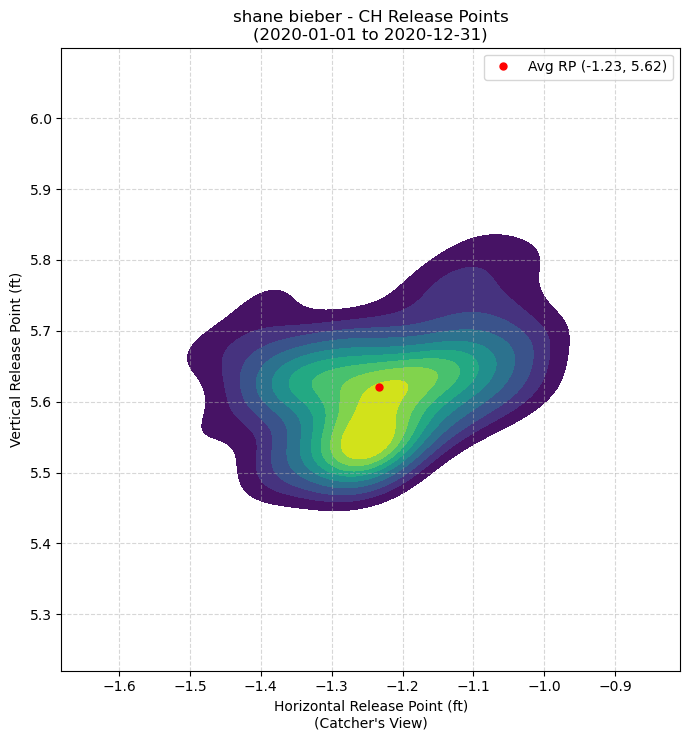


Generating plot for: FC (217 pitches)


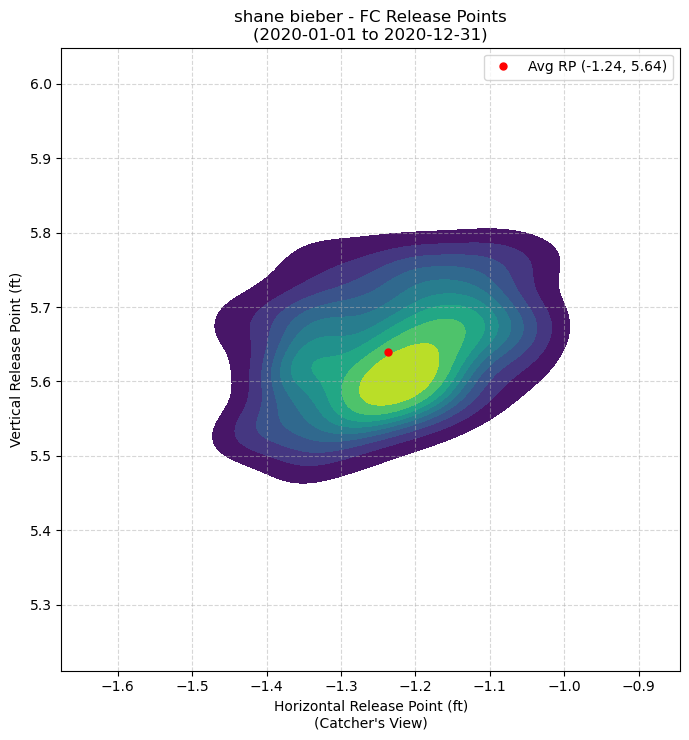


Generating plot for: FF (501 pitches)


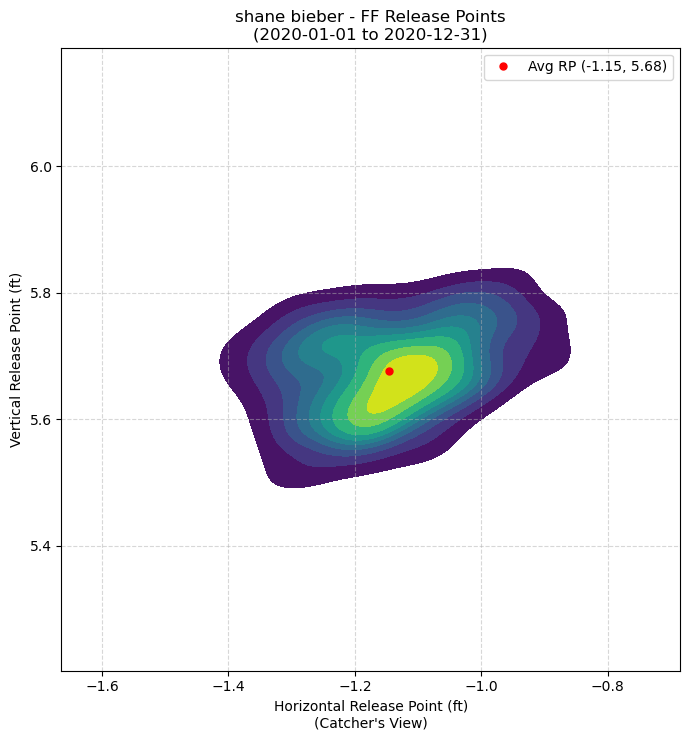


Generating plot for: KC (363 pitches)


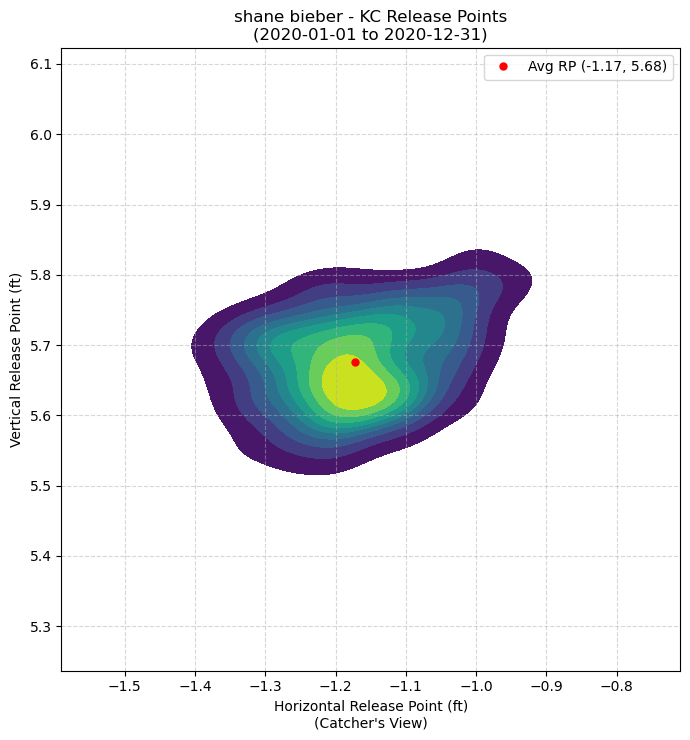


Generating plot for: SL (151 pitches)


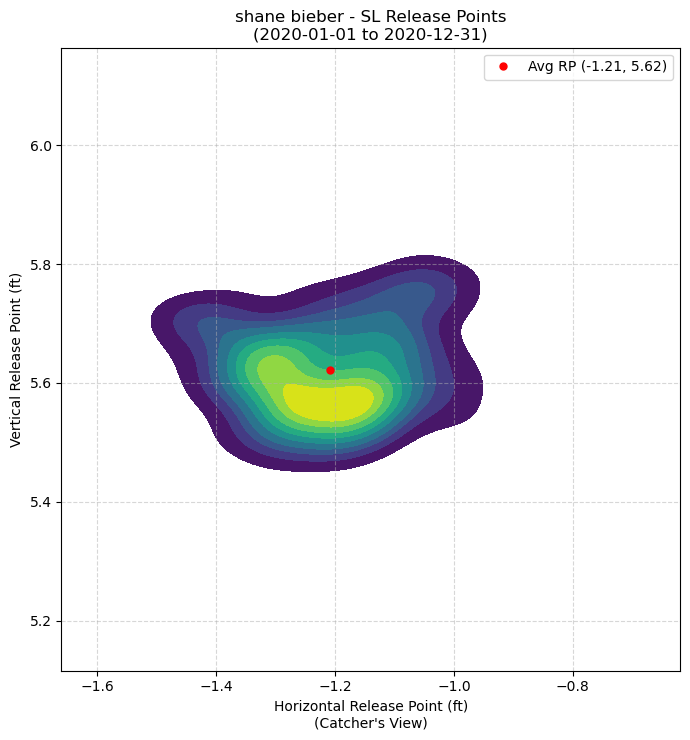

--- End of Block 8 ---


In [65]:
# Block 8: Visualize Release Points (Separate Plot per Pitch Type)

print("\n--- Block 8: Analyzing Pitch Release Points (Separate Plot per Pitch Type) ---")

# Check prerequisite data and variables from Block 1
if 'pitcher_statcast_data' in locals() and pitcher_statcast_data is not None and not pitcher_statcast_data.empty and \
   'pitcher_first_name' in locals() and pitcher_first_name and \
   'start_date' in locals() and start_date and \
   'end_date' in locals() and end_date:

    # --- Define Required Columns ---
    required_cols = ['release_pos_x', 'release_pos_z', 'pitch_type']

    # Check if all required columns exist
    if all(col in pitcher_statcast_data.columns for col in required_cols):

        # --- Data Preparation ---
        # Filter for pitches with valid release point data and pitch type
        release_data = pitcher_statcast_data[
            pitcher_statcast_data['release_pos_x'].notna() &
            pitcher_statcast_data['release_pos_z'].notna() &
            pitcher_statcast_data['pitch_type'].notna()
        ].copy()

        if not release_data.empty:
            print(f"Found {len(release_data)} pitches with release point data.")

            # Get unique pitch types, sort them
            unique_pitches = sorted(release_data['pitch_type'].unique())
            print(f"Pitch Types Found: {', '.join(unique_pitches)}")

            # --- Determine Consistent Axis Limits ---
            # Find overall min/max for x and z to keep plots comparable
            x_min, x_max = release_data['release_pos_x'].min(), release_data['release_pos_x'].max()
            z_min, z_max = release_data['release_pos_z'].min(), release_data['release_pos_z'].max()
            # Add a small buffer
            x_buffer = (x_max - x_min) * 0.1
            z_buffer = (z_max - z_min) * 0.1
            plot_xlim = (x_min - x_buffer, x_max + x_buffer)
            plot_ylim = (z_min - z_buffer, z_max + z_buffer)
            print(f"Setting consistent plot limits: X={plot_xlim}, Z={plot_ylim}")


            # --- Loop Through Pitch Types and Plot ---
            for pitch_name in unique_pitches:
                pitch_specific_data = release_data[release_data['pitch_type'] == pitch_name]
                pitch_count = len(pitch_specific_data)
                print(f"\nGenerating plot for: {pitch_name} ({pitch_count} pitches)")

                # Need at least a few points for KDE to work well
                if pitch_count < 5:
                    print(f"  -> Skipping KDE plot for {pitch_name} due to insufficient data points ({pitch_count}).")
                    continue

                try:
                    plt.figure(figsize=(7, 7.5)) # Square figure, bit taller for title
                    ax_rel = plt.gca()

                    # Create KDE plot for this specific pitch type
                    sns.kdeplot(
                        data=pitch_specific_data,
                        x='release_pos_x',
                        y='release_pos_z',
                        fill=True,          # Shade the density areas
                        cmap='viridis',     # Use a single sequential colormap
                        thresh=0.1,         # Adjust density threshold
                        ax=ax_rel
                    )

                    # Optionally: Add a marker for the average release point of this pitch
                    avg_x = pitch_specific_data['release_pos_x'].mean()
                    avg_z = pitch_specific_data['release_pos_z'].mean()
                    ax_rel.plot(avg_x, avg_z, 'ro', markersize=5, label=f'Avg RP ({avg_x:.2f}, {avg_z:.2f})')

                    # Apply consistent limits and aspect ratio
                    plt.xlim(plot_xlim)
                    plt.ylim(plot_ylim)
                    plt.axis('equal')

                    plt.title(f"{pitcher_first_name} {pitcher_last_name} - {pitch_name} Release Points\n({start_date} to {end_date})")
                    plt.xlabel("Horizontal Release Point (ft)\n(Catcher's View)")
                    plt.ylabel("Vertical Release Point (ft)")
                    plt.grid(True, linestyle='--', alpha=0.5)
                    plt.legend()
                    plt.tight_layout()
                    plt.show()

                except Exception as e:
                     print(f"  -> Could not generate plot for {pitch_name}. Error: {e}")


        else:
            print(f"No pitches with valid release point data found for {pitcher_first_name} {pitcher_last_name} "
                  f"in the period {start_date} to {end_date}.")
    else:
        # Required columns missing
        missing = [col for col in required_cols if col not in pitcher_statcast_data.columns]
        print(f"Skipping release point analysis because required columns are missing: {', '.join(missing)}")

elif pitcher_statcast_data is None:
    print("Skipping release point analysis because pitcher data was not loaded successfully in Block 1.")
else: # Case where data is loaded but empty, or other variables missing
     print("Skipping release point analysis because the dataset was empty or pitcher/date info is missing.")

print("--- End of Block 8 ---")


--- Block 8: Analyzing Pitch Release Points (Scatter Plot per Pitch Type) ---
Found 1343 pitches with release point data.
Pitch Types Found: CH, FC, FF, KC, SL
Setting consistent plot limits: X=(-1.591, -0.7390000000000001), Z=(5.415, 5.955)

Generating plot for: CH (111 pitches)


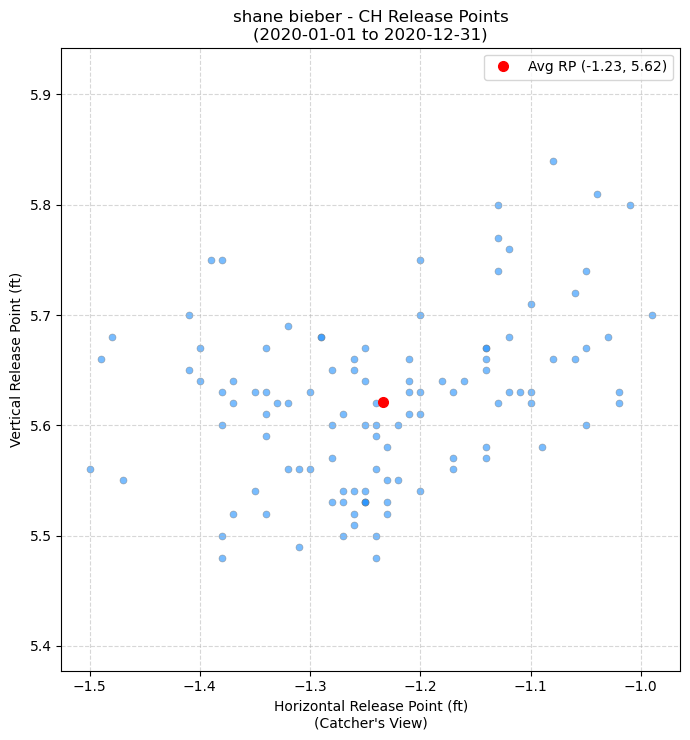


Generating plot for: FC (217 pitches)


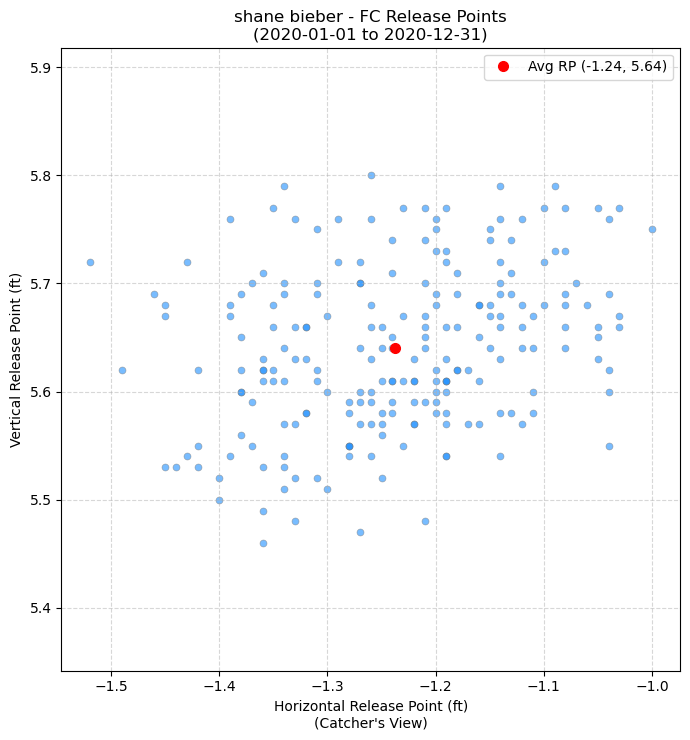


Generating plot for: FF (501 pitches)


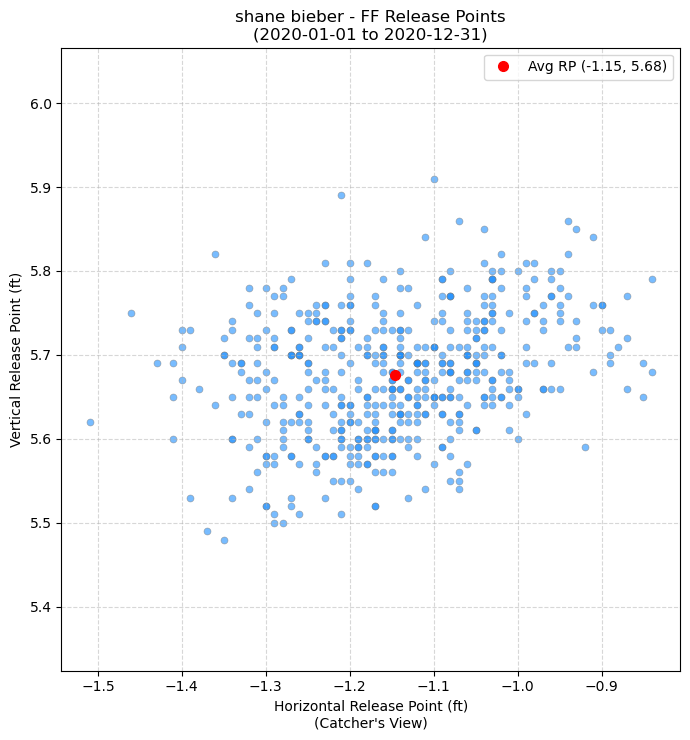


Generating plot for: KC (363 pitches)


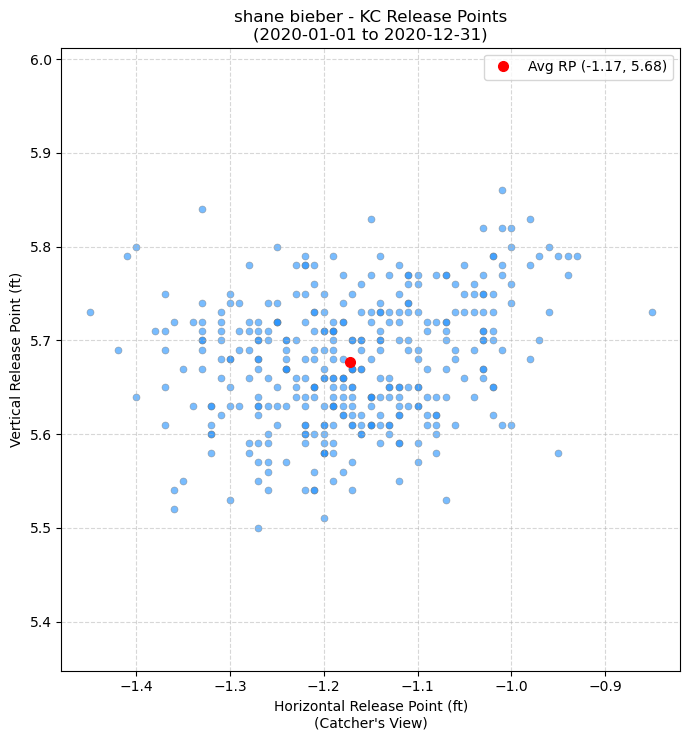


Generating plot for: SL (151 pitches)


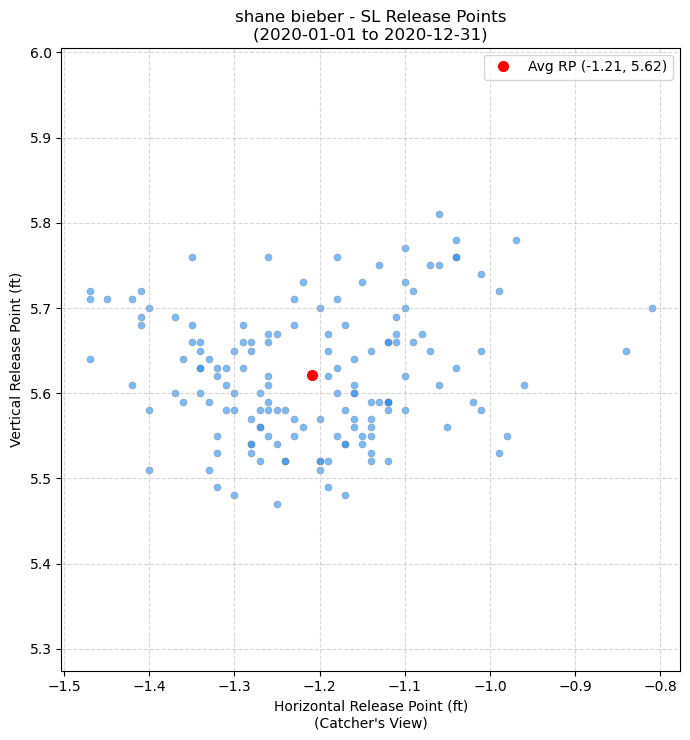

--- End of Block 8 ---


In [67]:
# Block 8: Visualize Release Points (Scatter Plot per Pitch Type)

print("\n--- Block 8: Analyzing Pitch Release Points (Scatter Plot per Pitch Type) ---")

# Check prerequisite data and variables from Block 1
if 'pitcher_statcast_data' in locals() and pitcher_statcast_data is not None and not pitcher_statcast_data.empty and \
   'pitcher_first_name' in locals() and pitcher_first_name and \
   'start_date' in locals() and start_date and \
   'end_date' in locals() and end_date:

    # --- Define Required Columns ---
    required_cols = ['release_pos_x', 'release_pos_z', 'pitch_type']

    # Check if all required columns exist
    if all(col in pitcher_statcast_data.columns for col in required_cols):

        # --- Data Preparation ---
        # Filter for pitches with valid release point data and pitch type
        release_data = pitcher_statcast_data[
            pitcher_statcast_data['release_pos_x'].notna() &
            pitcher_statcast_data['release_pos_z'].notna() &
            pitcher_statcast_data['pitch_type'].notna()
        ].copy()

        if not release_data.empty:
            print(f"Found {len(release_data)} pitches with release point data.")

            # Get unique pitch types, sort them
            unique_pitches = sorted(release_data['pitch_type'].unique())
            print(f"Pitch Types Found: {', '.join(unique_pitches)}")

            # --- Determine Consistent Axis Limits ---
            x_min, x_max = release_data['release_pos_x'].min(), release_data['release_pos_x'].max()
            z_min, z_max = release_data['release_pos_z'].min(), release_data['release_pos_z'].max()
            x_buffer = (x_max - x_min) * 0.1; z_buffer = (z_max - z_min) * 0.1
            plot_xlim = (x_min - x_buffer, x_max + x_buffer)
            plot_ylim = (z_min - z_buffer, z_max + z_buffer)
            print(f"Setting consistent plot limits: X={plot_xlim}, Z={plot_ylim}")


            # --- Loop Through Pitch Types and Plot ---
            for pitch_name in unique_pitches:
                pitch_specific_data = release_data[release_data['pitch_type'] == pitch_name]
                pitch_count = len(pitch_specific_data)
                print(f"\nGenerating plot for: {pitch_name} ({pitch_count} pitches)")

                if pitch_count < 1: # Need at least one point to plot
                    print(f"  -> Skipping scatter plot for {pitch_name} due to no data points.")
                    continue

                try:
                    plt.figure(figsize=(7, 7.5))
                    ax_rel = plt.gca()

                    # --- Create Scatter Plot --- ## MODIFIED PLOT TYPE ##
                    sns.scatterplot(
                        data=pitch_specific_data,
                        x='release_pos_x',
                        y='release_pos_z',
                        s=25,               # Point size
                        alpha=0.6,          # Transparency for overlaps
                        color="dodgerblue", # Use a consistent color for points
                        edgecolor="grey",   # Add edge color (optional)
                        linewidth=0.5,      # Edge line width (optional)
                        ax=ax_rel,
                        legend=False        # Don't add scatter points themselves to legend
                    )

                    # Add a marker for the average release point of this pitch
                    avg_x = pitch_specific_data['release_pos_x'].mean()
                    avg_z = pitch_specific_data['release_pos_z'].mean()
                    ax_rel.plot(avg_x, avg_z, 'ro', markersize=7, label=f'Avg RP ({avg_x:.2f}, {avg_z:.2f})')

                    # Apply consistent limits and aspect ratio
                    plt.xlim(plot_xlim)
                    plt.ylim(plot_ylim)
                    plt.axis('equal')

                    plt.title(f"{pitcher_first_name} {pitcher_last_name} - {pitch_name} Release Points\n({start_date} to {end_date})")
                    plt.xlabel("Horizontal Release Point (ft)\n(Catcher's View)")
                    plt.ylabel("Vertical Release Point (ft)")
                    plt.grid(True, linestyle='--', alpha=0.5)
                    plt.legend() # Show legend for the average point marker
                    plt.tight_layout()
                    plt.show()

                except Exception as e:
                     print(f"  -> Could not generate plot for {pitch_name}. Error: {e}")


        else:
            print(f"No pitches with valid release point data found for {pitcher_first_name} {pitcher_last_name} "
                  f"in the period {start_date} to {end_date}.")
    else:
        # Required columns missing
        missing = [col for col in required_cols if col not in pitcher_statcast_data.columns]
        print(f"Skipping release point analysis because required columns are missing: {', '.join(missing)}")

elif pitcher_statcast_data is None:
    print("Skipping release point analysis because pitcher data was not loaded successfully in Block 1.")
else: # Case where data is loaded but empty, or other variables missing
     print("Skipping release point analysis because the dataset was empty or pitcher/date info is missing.")

print("--- End of Block 8 ---")